In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and understanding data

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data cleaning and manipulation

In [5]:
missing_percent = (df.isnull().sum()/len(df.index))*100
missing_percent[missing_percent>0].sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

We can see that a total of 19 columns have missing values and 6 of them have more than 45% null values. Lets get some understanding from data dictionary

In [6]:
#From the Data Description
#NA = No Pool for PoolQC
#NA = No Misc Feature for MiscFeature
#NA = No Alley for alley
#NA = No Fireplace for FireplaceQu
#NA = No Fence
#NA = No Garage for GarageCond, GarageType, GarageFinish, GarageQual, garage_age
#NA = No Basement for BsmtExposure, BsmtFinType2 ,BsmtCond ,BsmtQual ,BsmtFinType1
#NA = No Masonery Area for MasVnrType, MasVnrArea
replace_null_columns = ['PoolQC', 'MiscFeature','Alley', 'FireplaceQu', 'Fence', 'GarageCond', 'GarageType',
                        'GarageFinish', 'GarageQual',  'BsmtExposure', 'BsmtFinType2' ,'BsmtCond' 
                        ,'BsmtQual' ,'BsmtFinType1', 'MasVnrType' ]
for column in replace_null_columns:
    df[column]= df[column].fillna('None')
    
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageQual'] = df['GarageQual'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [7]:
l=df.isnull().sum()
l[l>0]

LotFrontage    259
Electrical       1
dtype: int64

In [8]:
#filling the nulls with mode for categorical variables
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [9]:
#filling the nulls with median for numeric variable
print(df['LotFrontage'].median())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

69.0


In [10]:
l=df.isnull().sum()
l[l>0]

Series([], dtype: int64)

All the nulls have been taken care of.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Dealing with data imbalance:
Data imbalance, also known as imbalanced classes, occurs when the training dataset contains a disproportionate ratio of samples in each class. This might lead to **poor performance and biased predictions**.

Identifying categorical features that have more than 80% data associated to one single value.

In [12]:
obj_list= []
obj_cols = df.select_dtypes(include=['object'])
for col in obj_cols:
    max_percent = (df[col].value_counts().max()/len(df.index))*100
    if max_percent >80:
        obj_list.append(col)
#         print(max_percent)
print(len(obj_list))
obj_list

24


['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
# Removing these columns from the dataset
df.drop(obj_list,axis =1, inplace = True)
df.shape

(1460, 57)

In [14]:
# dropping ID Column as it is not needed in the model
df.drop('Id', axis=1, inplace=True)

In [15]:
cols_list= []
numeric_cols = df.select_dtypes(include=['int64','int32','float32','float64'])
for col in numeric_cols:
    max_percent = (df[col].value_counts().max()/len(df.index))*100
    if max_percent >80:
        cols_list.append(col)
#         print(max_percent)
print(len(cols_list))
cols_list

9


['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

The above 9 columns have data skewed and can impact model performance and lead to biased predictions. So dropping them.

In [16]:
df = df.drop(cols_list, axis=1)
df.shape

(1460, 47)

### Visualising Categorical Variables

In [17]:
categorical_var = df.select_dtypes(include='object').columns
len(categorical_var)

19

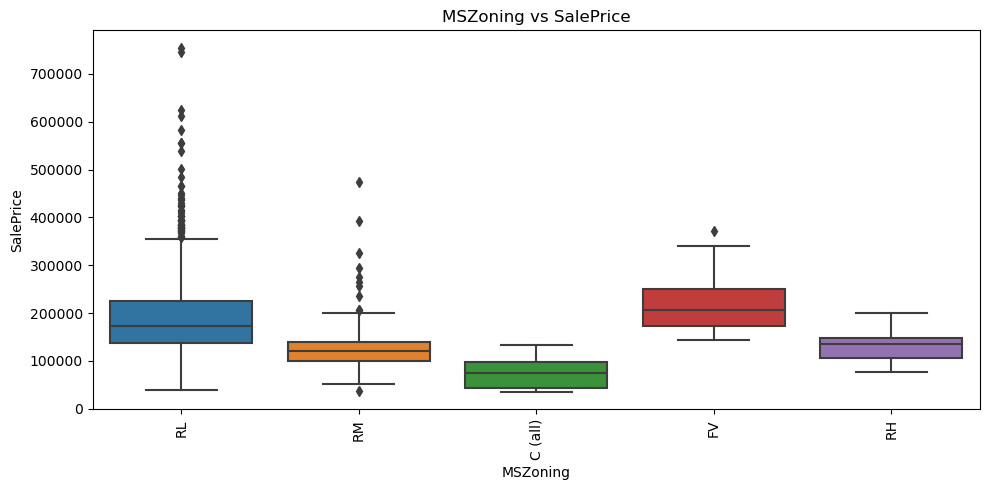

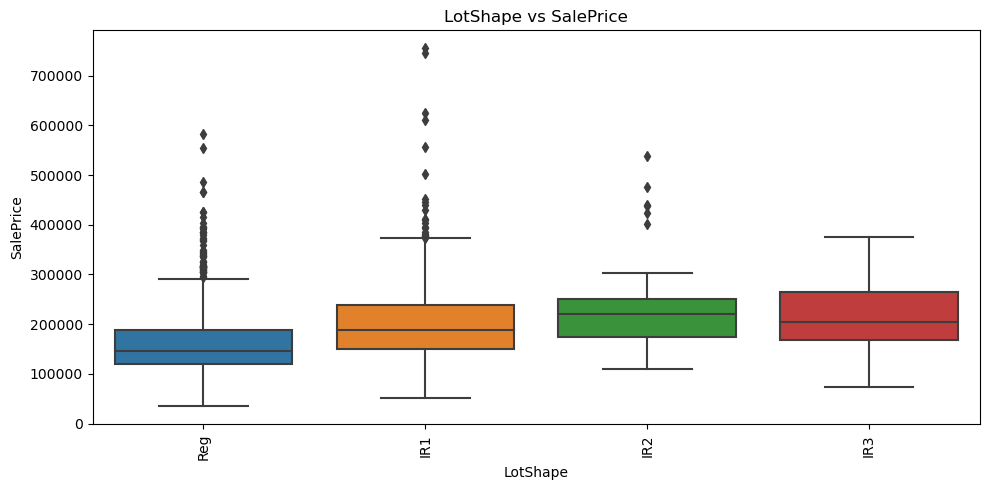

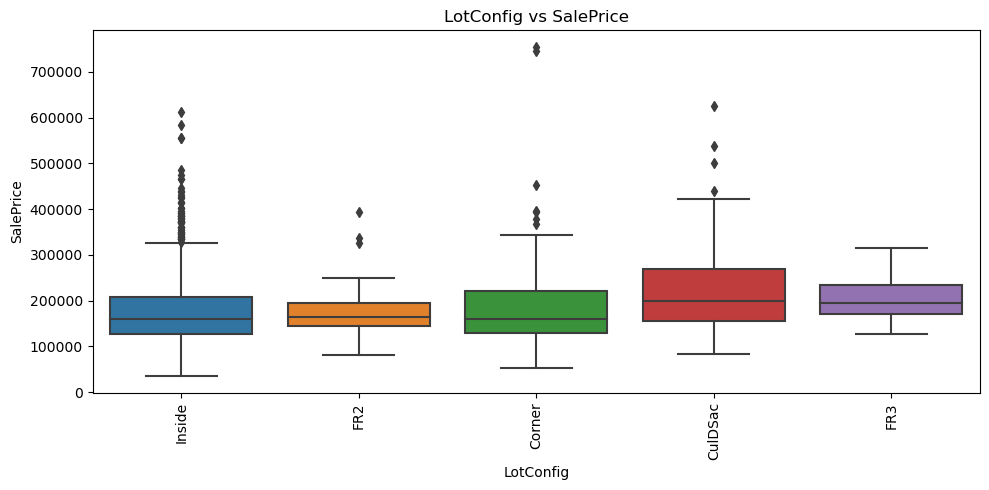

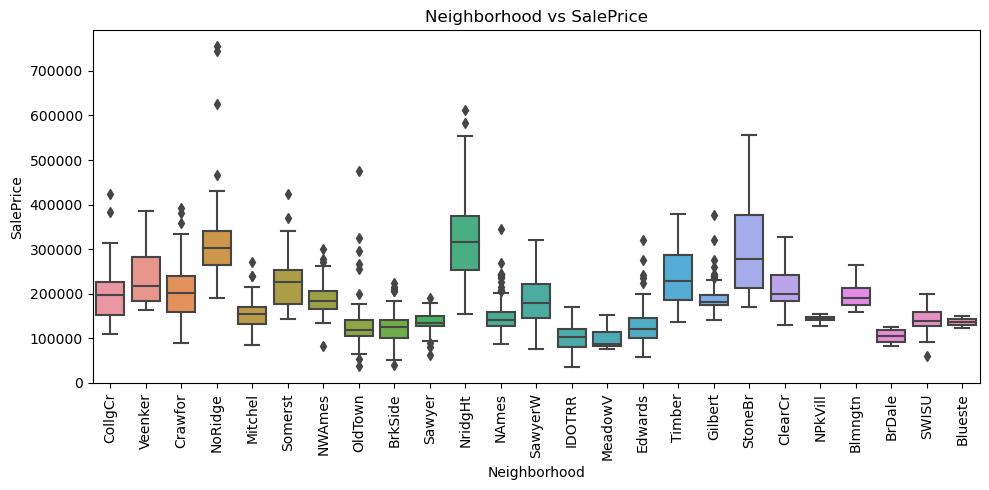

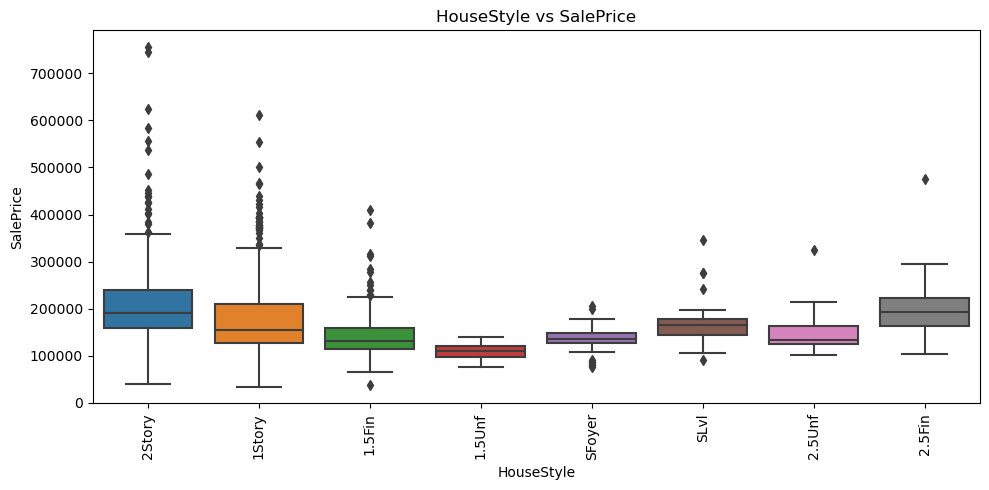

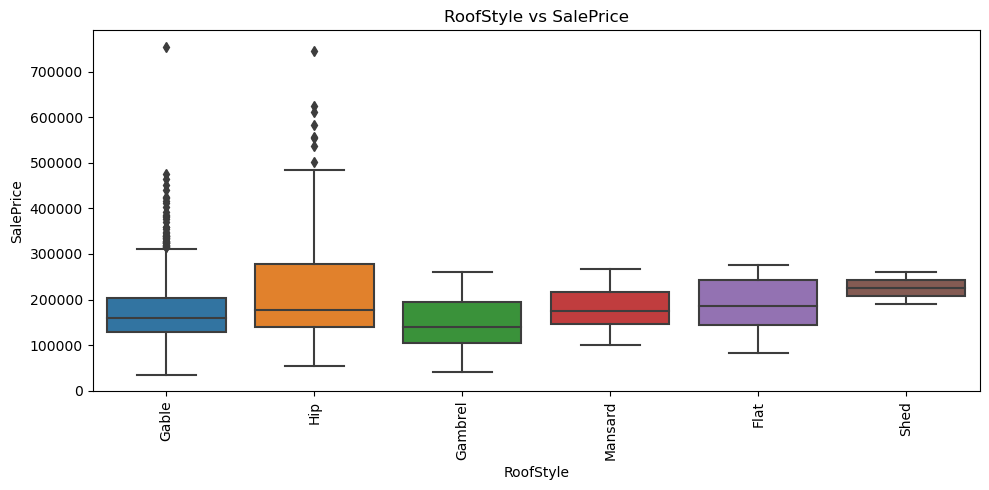

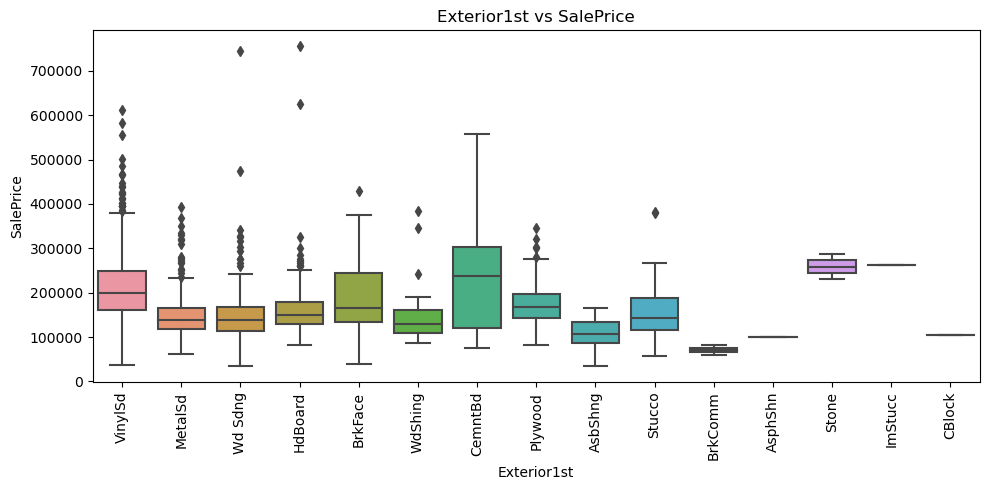

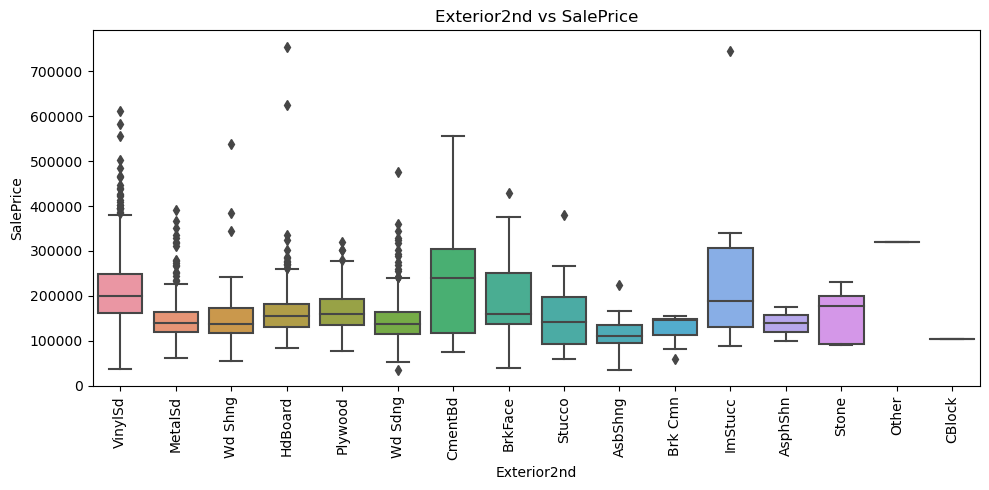

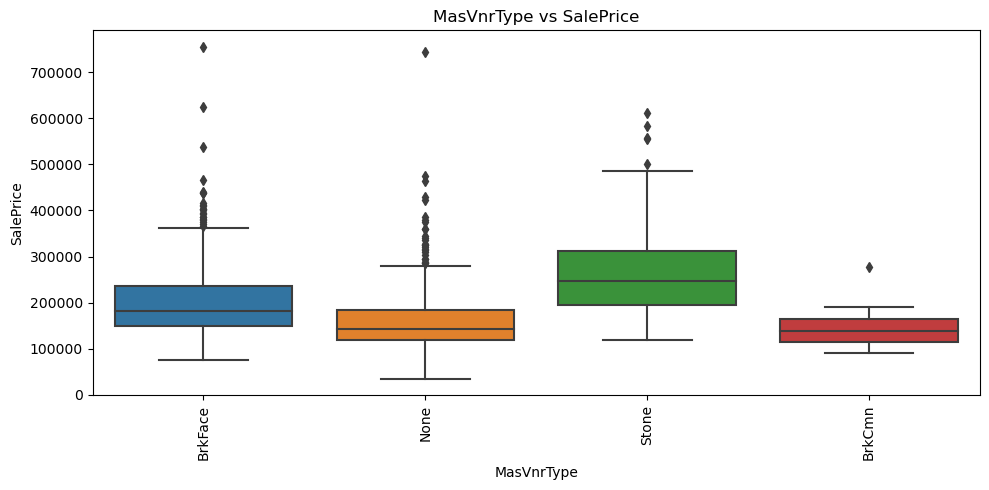

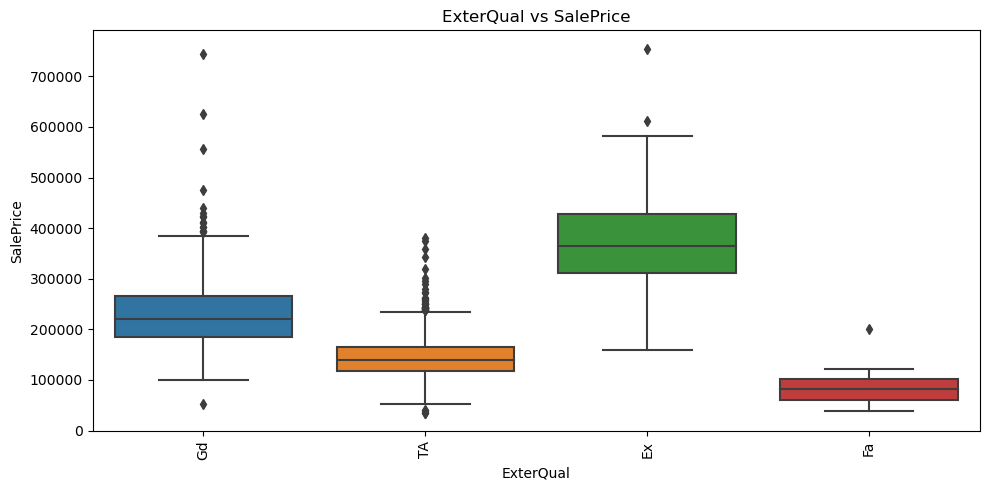

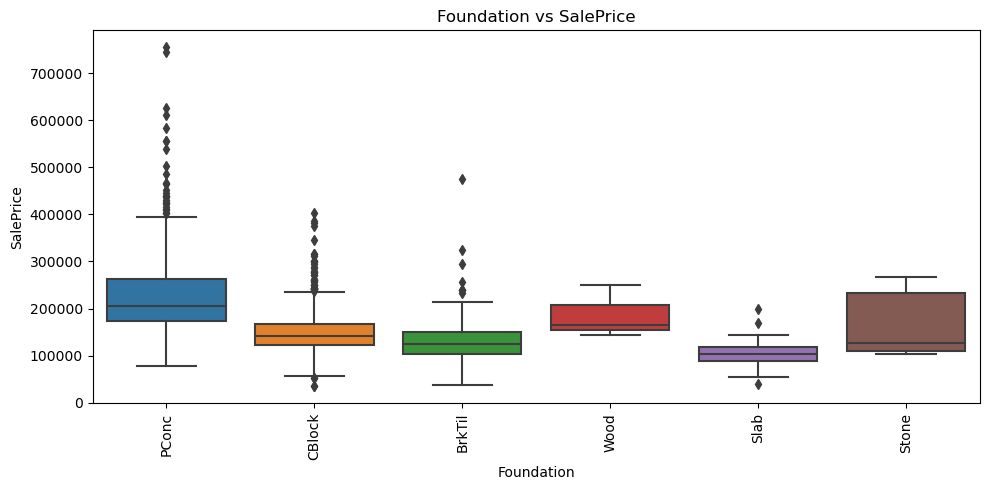

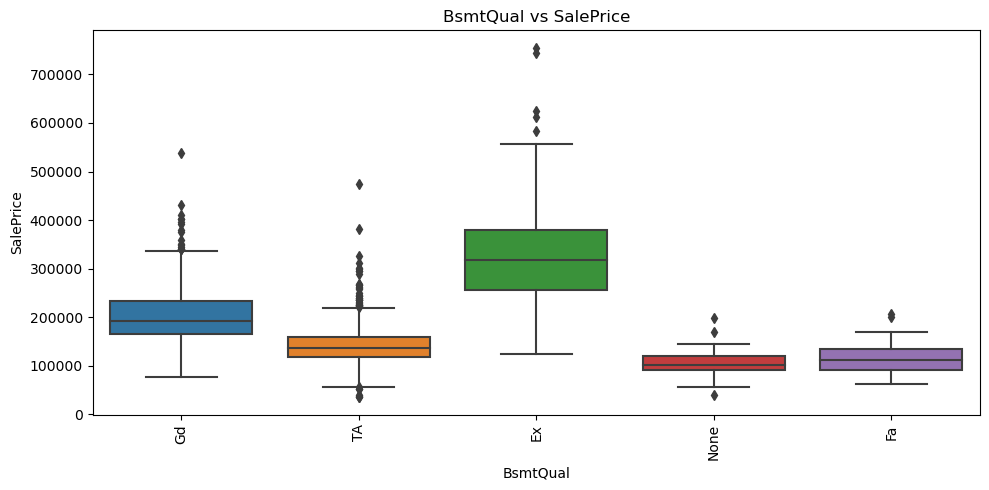

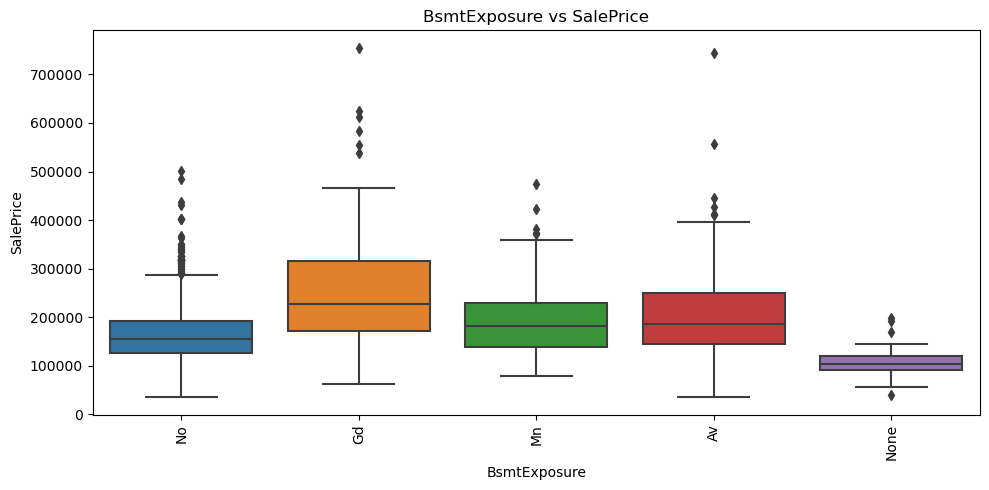

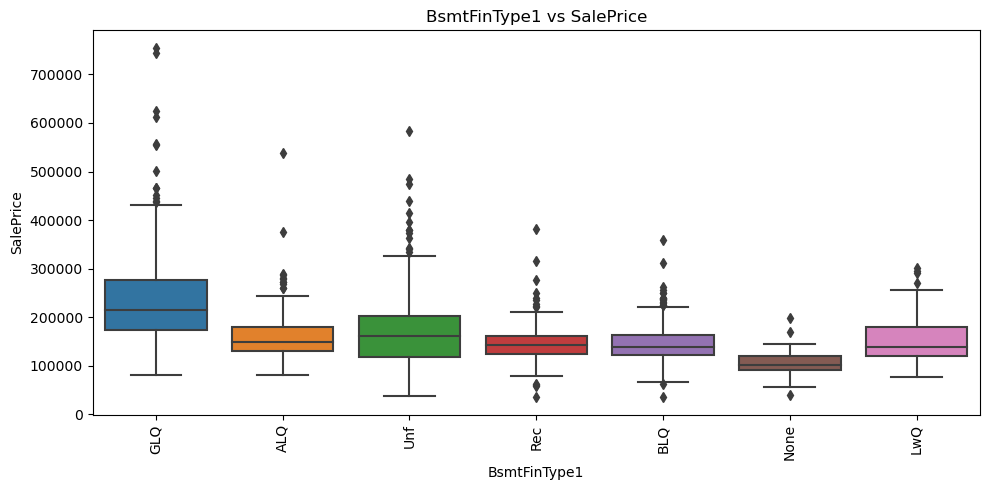

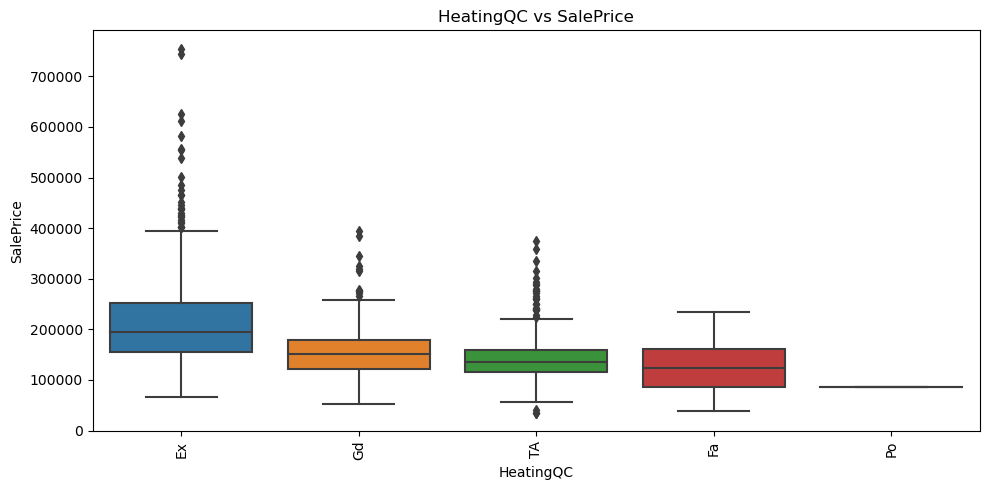

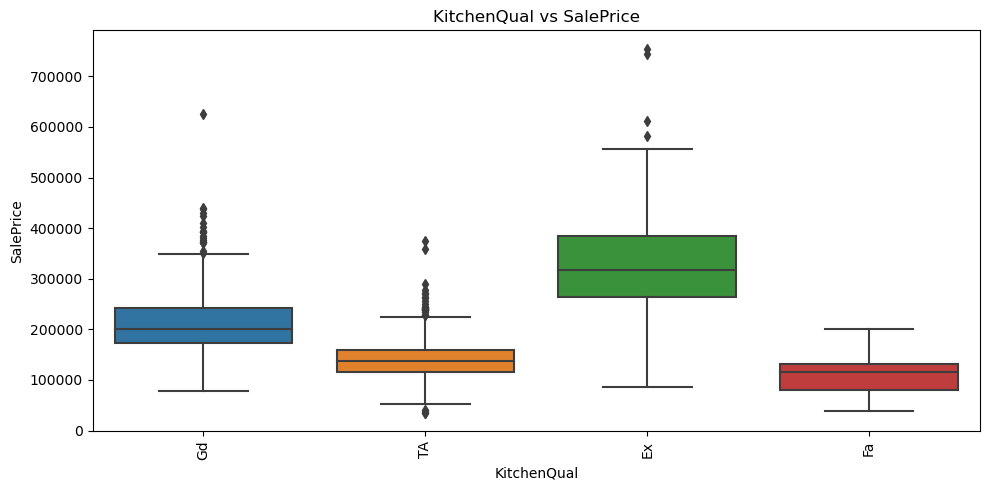

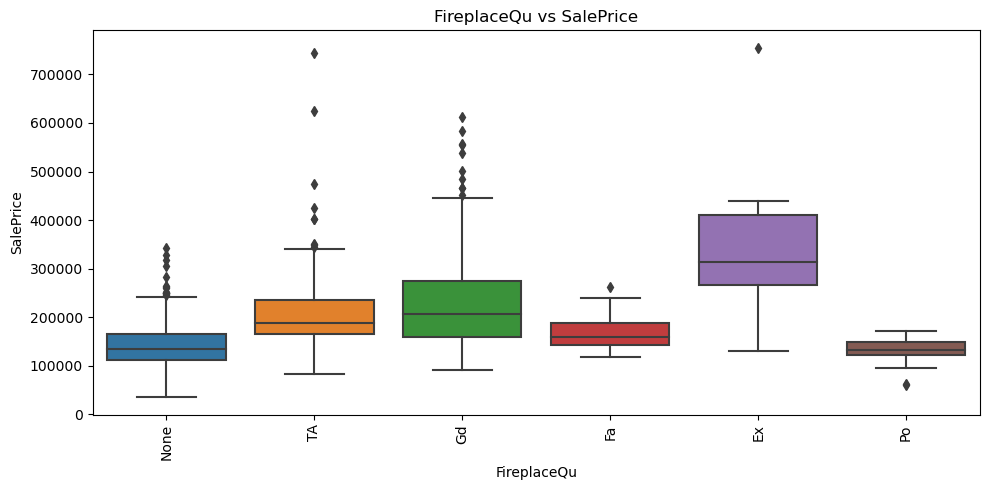

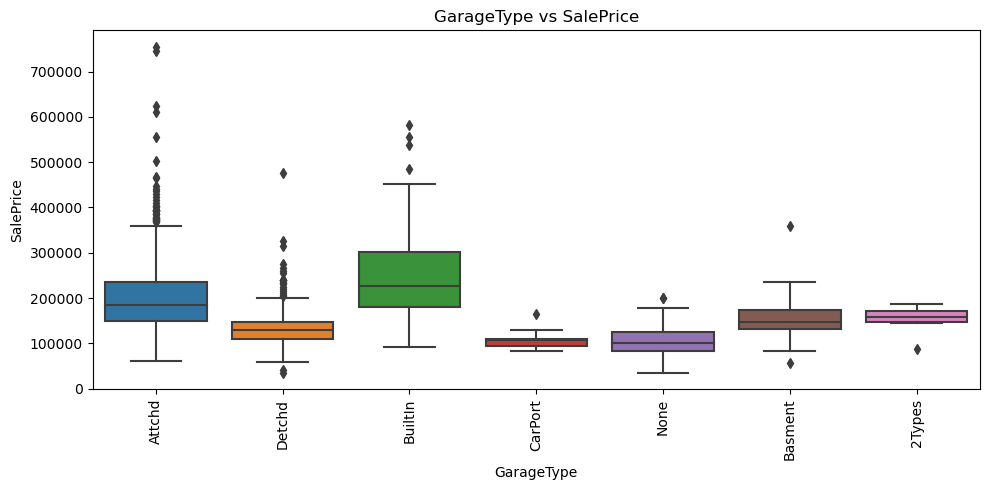

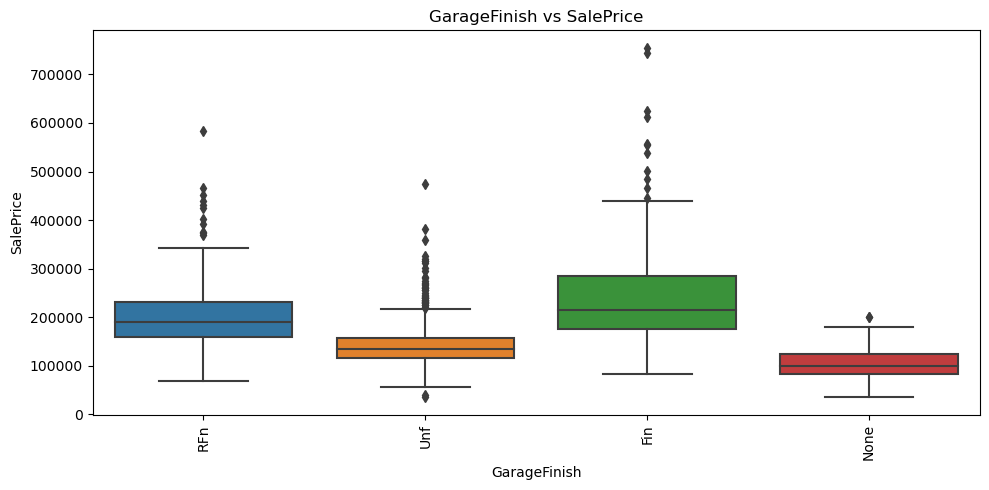

In [18]:
for i in  categorical_var:
    plt.figure(figsize=(10,5))
    plt.title(i +' vs SalePrice')
    sns.boxplot(x=i, y='SalePrice', data = df)
    x=plt.xticks(rotation=90)
    plt.tight_layout()

#### Inferences from the above plots
houses are sold at a higher price
- when they have excellent quality of the external material
- basement height > 100 inches
- have excellent kitchen quality, fireplace quality
 
 ### Visualising numeric data

In [19]:
# Derived columns
df['age']=df['YrSold']-df['YearBuilt']
def Remodel_func(row):    
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0    
    else:
        return 1   
    
df['remodel_flag'] = df.apply(Remodel_func, axis=1)

## Removing the old columns that are used to create new derived columns
df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,age,remodel_flag
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,Attchd,RFn,2,548,0,61,2,208500,5,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,Attchd,RFn,2,460,298,0,5,181500,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,Attchd,RFn,2,608,0,42,9,223500,7,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Detchd,Unf,3,642,0,35,2,140000,91,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,Attchd,RFn,3,836,192,84,12,250000,8,0


In [20]:
numeric_data = df.select_dtypes(include=['int64','int32','float32','float64'])
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,age,remodel_flag
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,8,0,2,548,0,61,2,208500,5,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,6,1,2,460,298,0,5,181500,31,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,6,1,2,608,0,42,9,223500,7,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,7,1,3,642,0,35,2,140000,91,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,9,1,3,836,192,84,12,250000,8,0


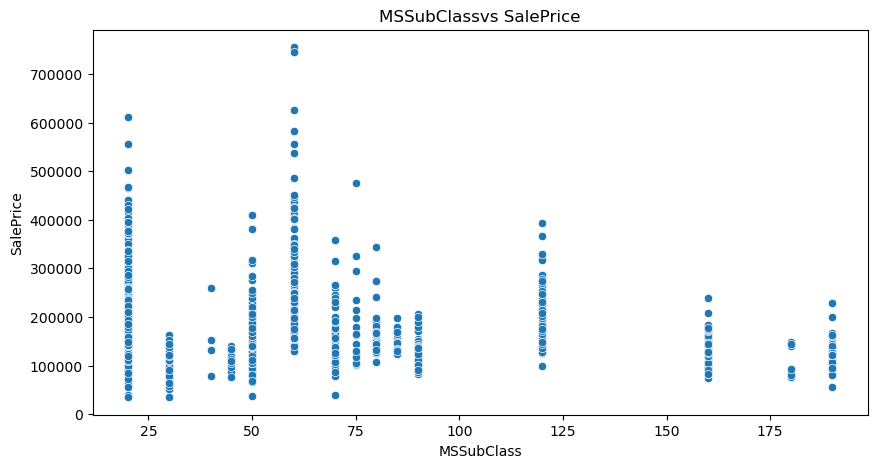

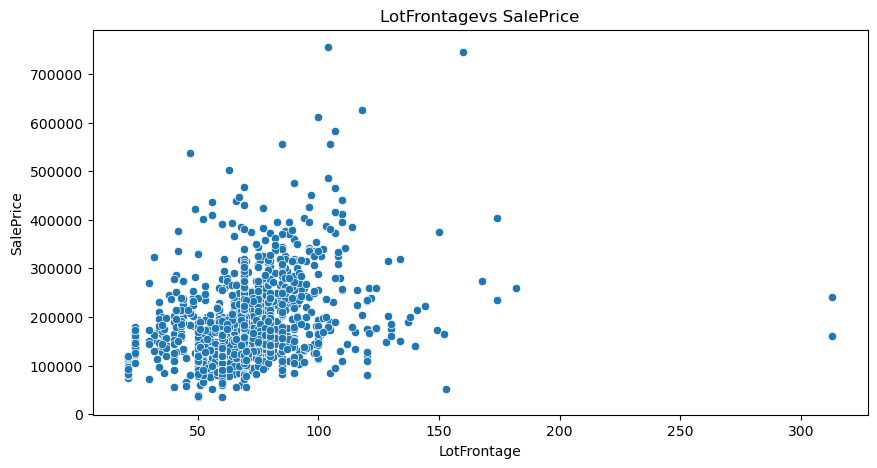

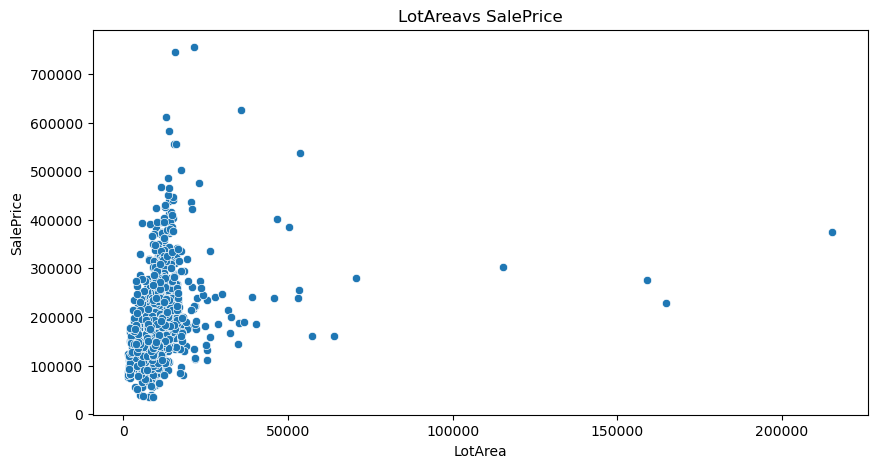

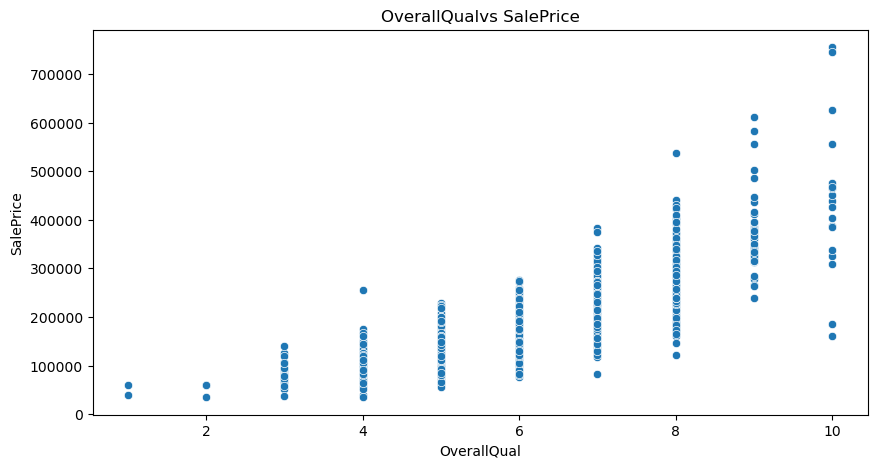

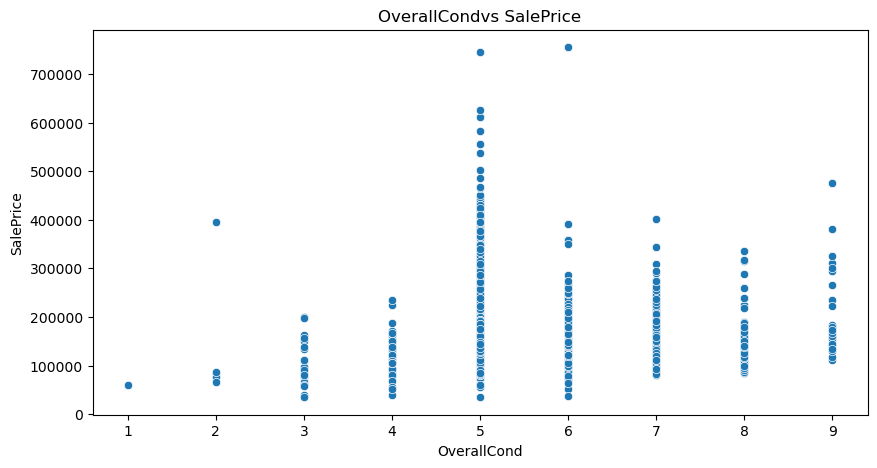

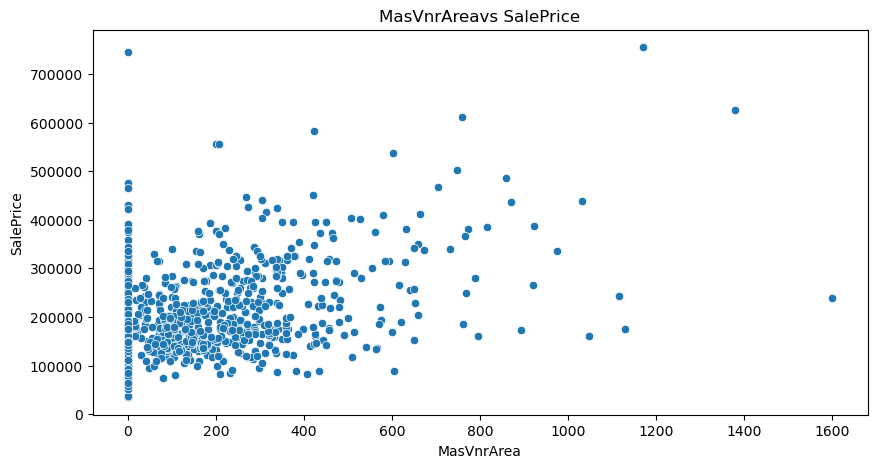

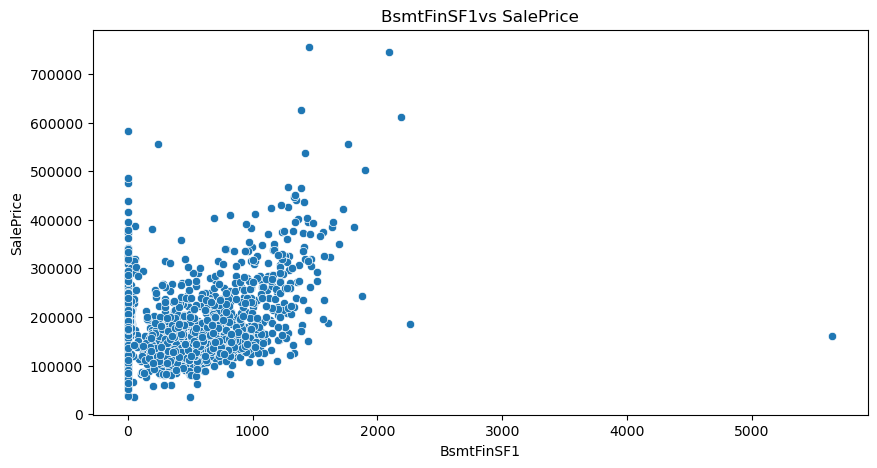

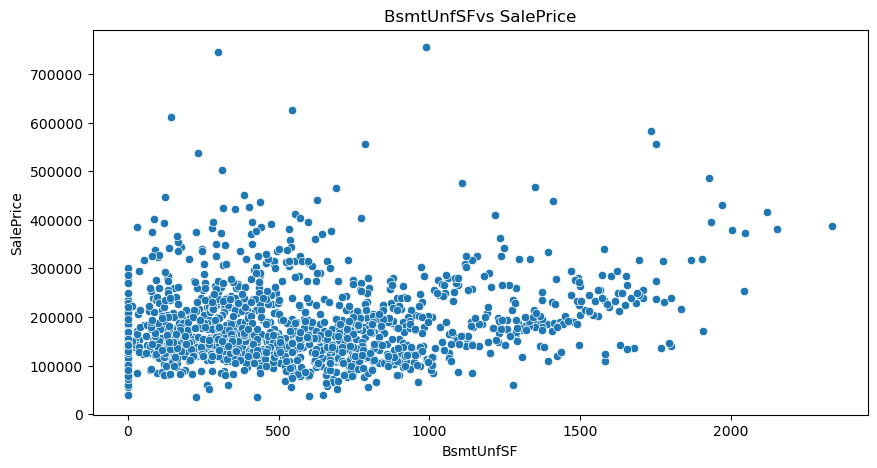

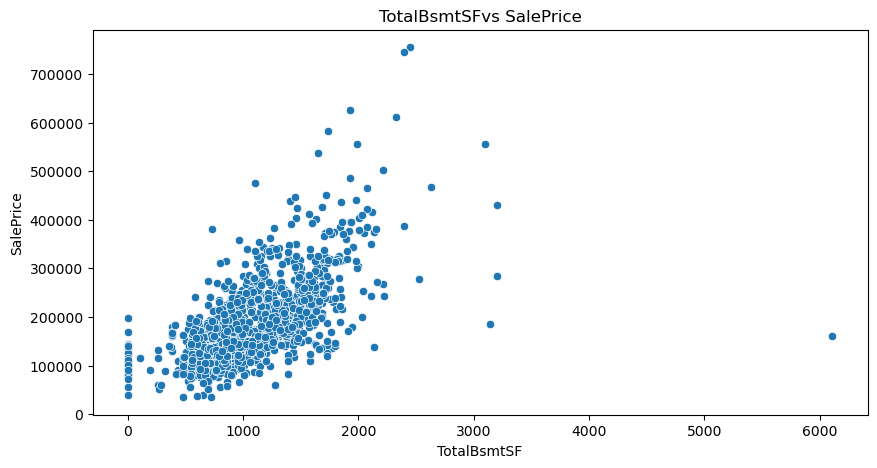

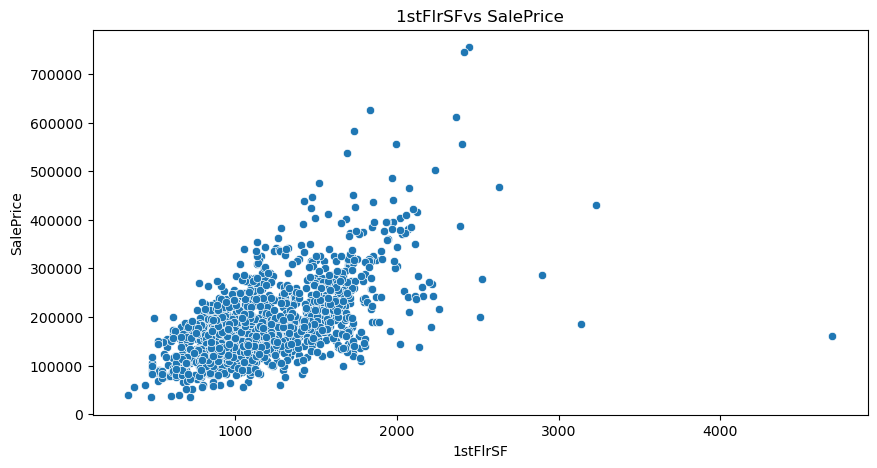

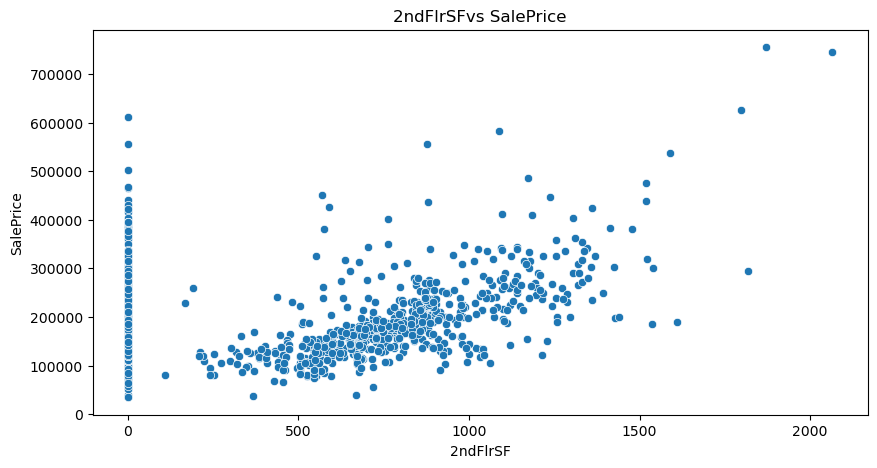

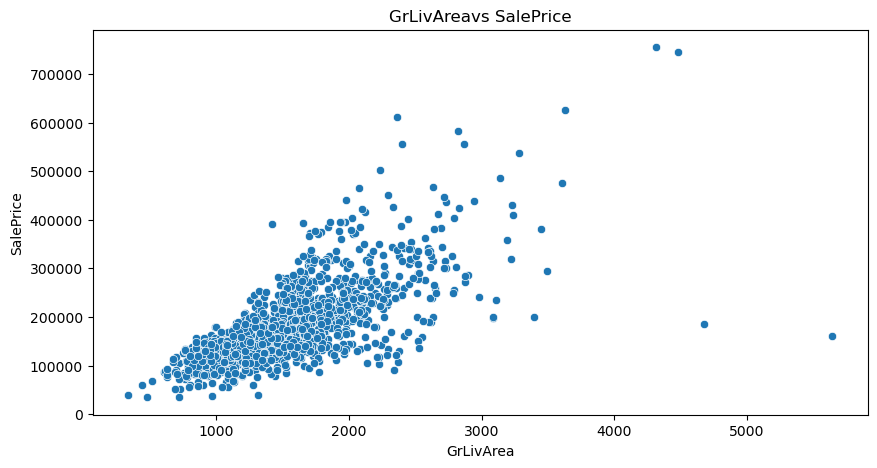

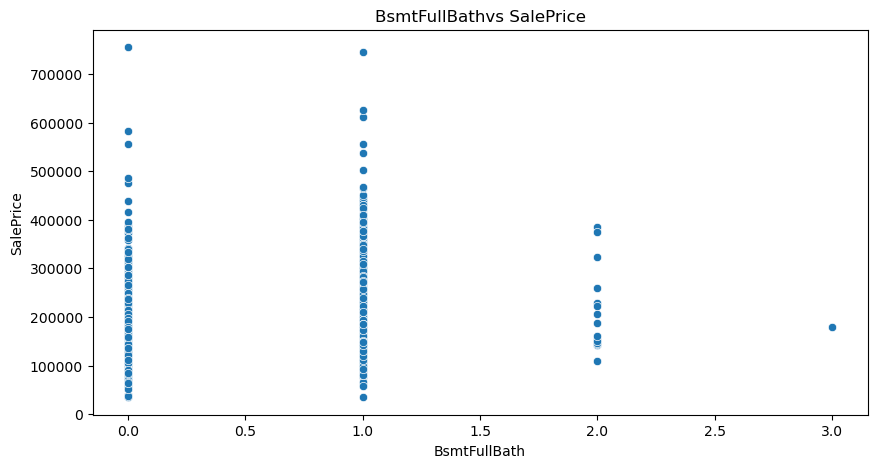

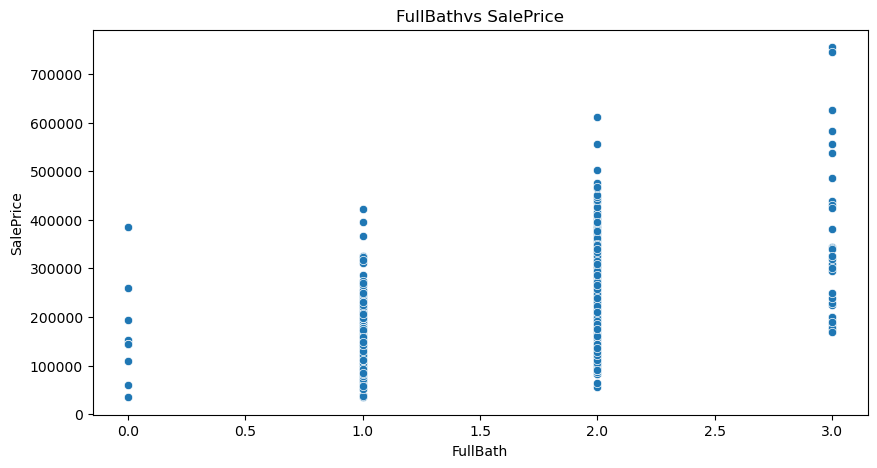

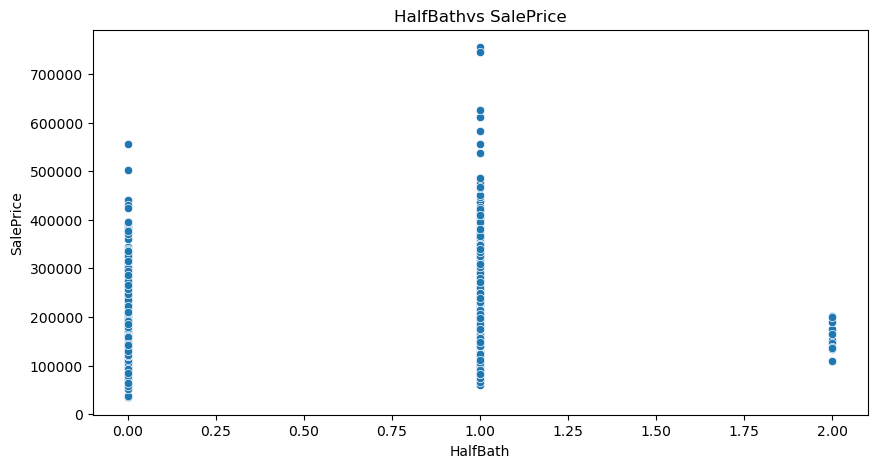

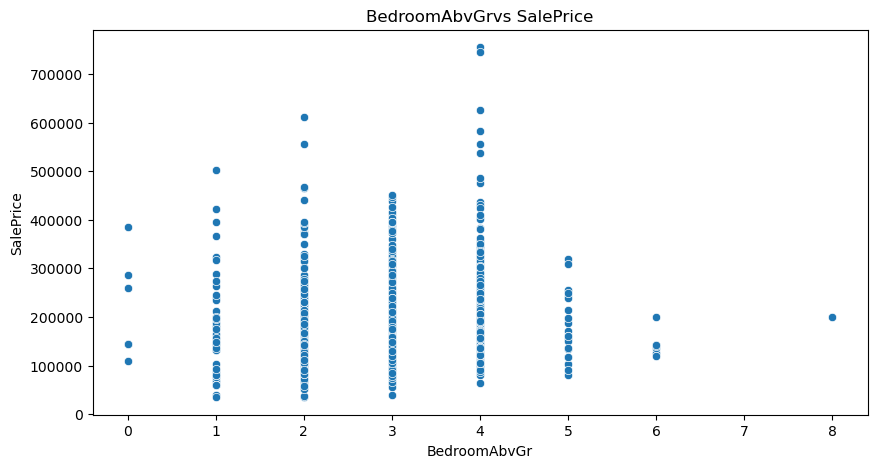

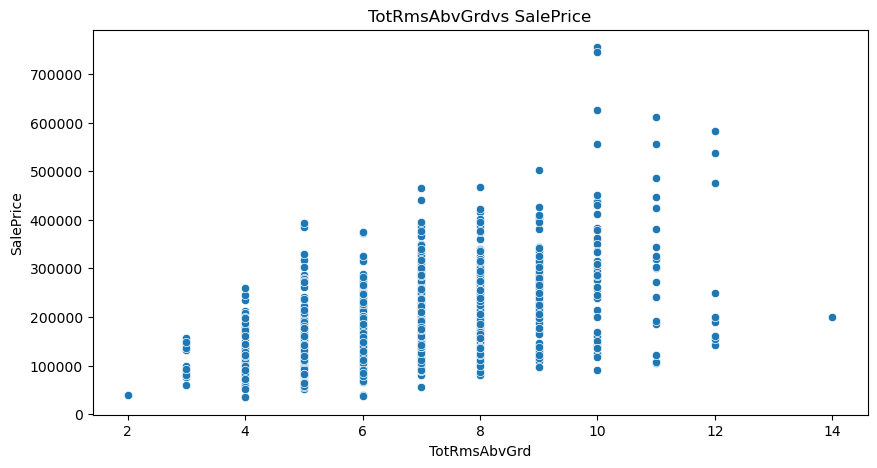

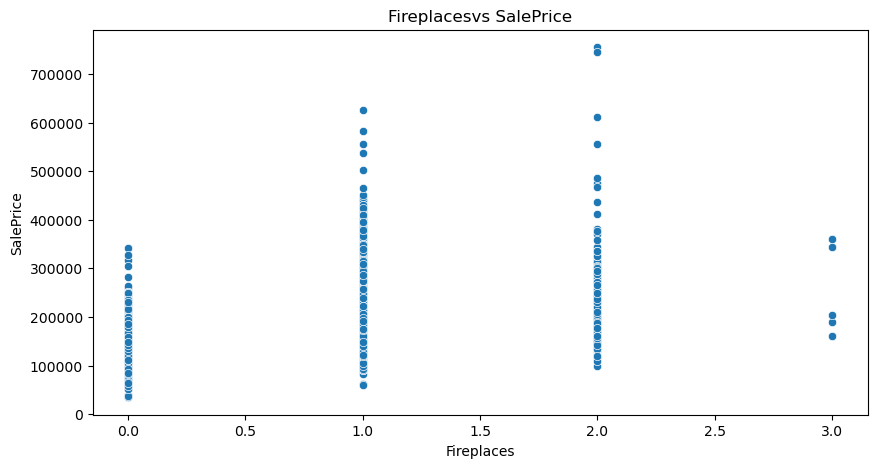

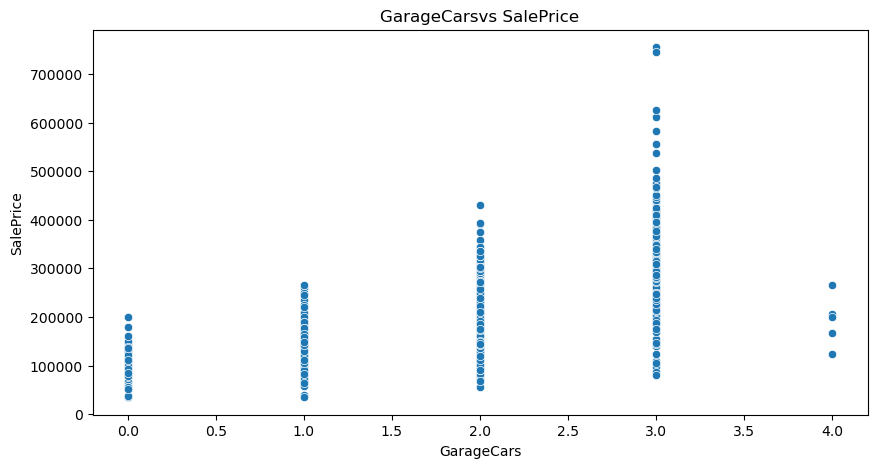

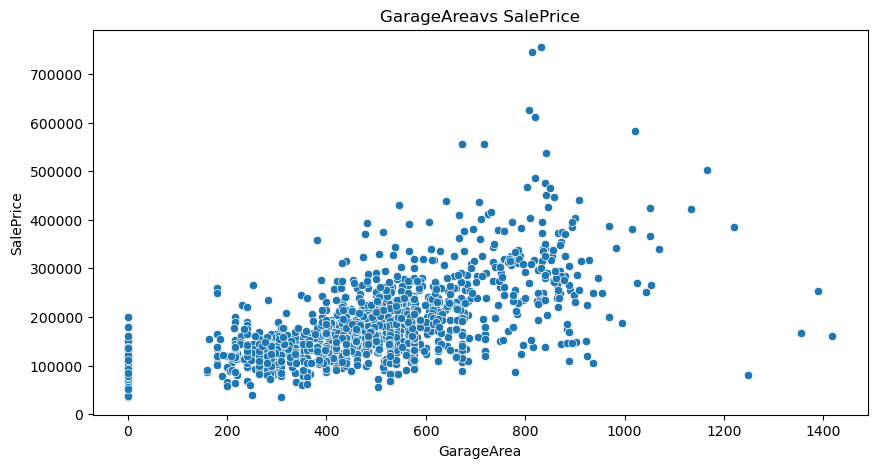

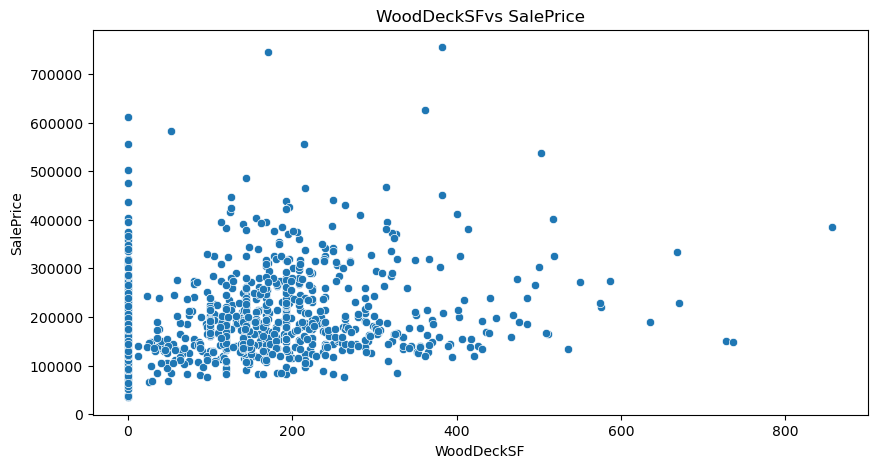

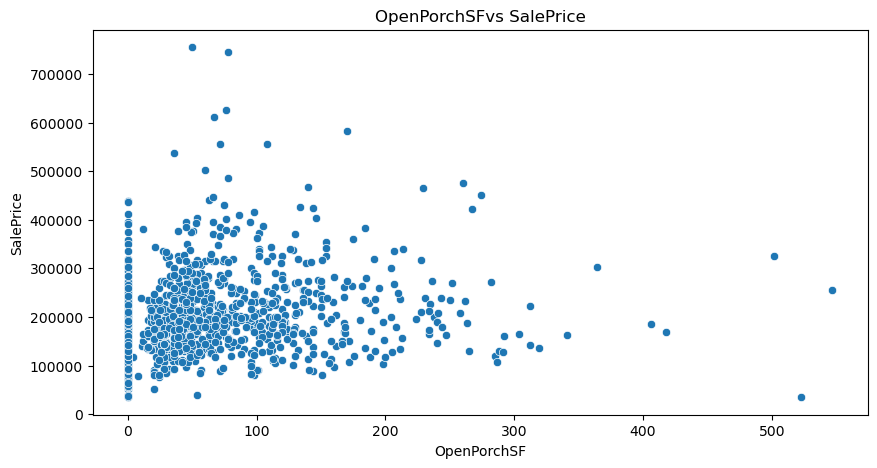

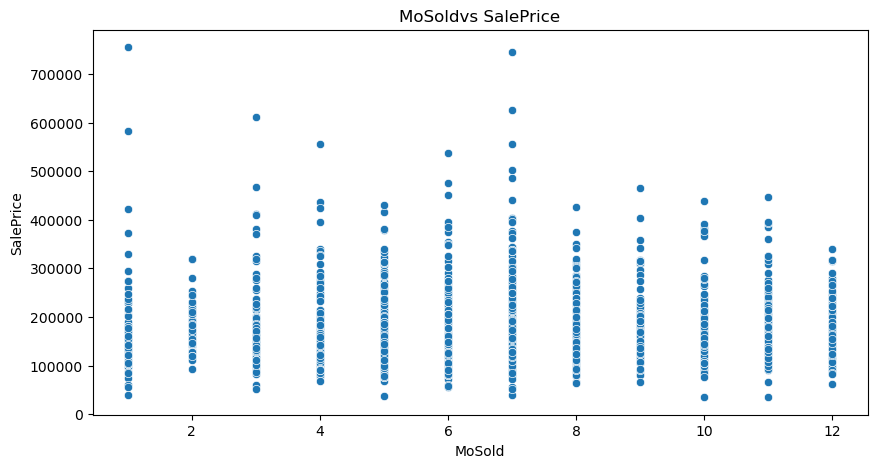

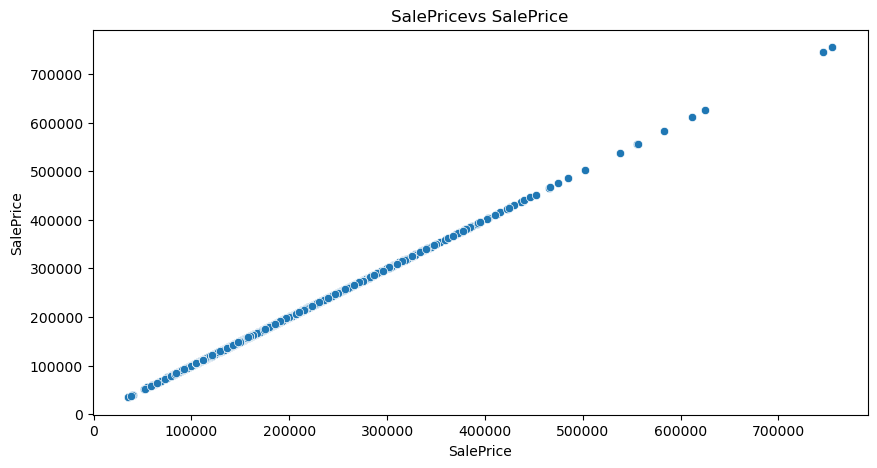

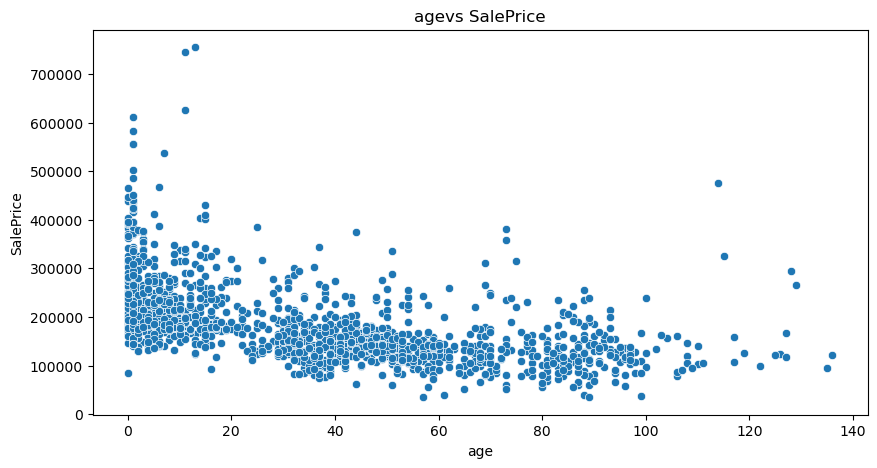

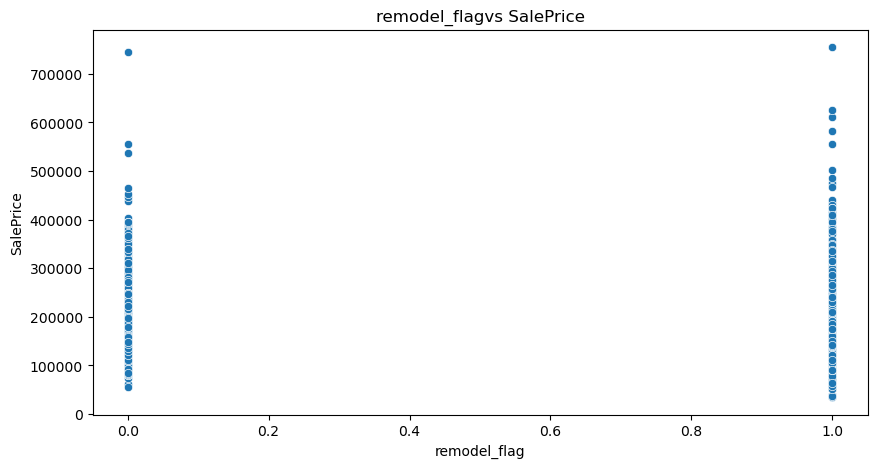

In [21]:
for i in numeric_data:
    plt.figure(figsize=(10,5))
    plt.title(i +'vs SalePrice')
    sns.scatterplot( x=i, y='SalePrice', data = numeric_data)
    

In [22]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['MoSold'] = df['MoSold'].astype(str)


## Outlier Treatment

In [23]:
##Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,age,remodel_flag
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,...,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,36.547945,0.476712
std,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,...,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.250152,0.499629
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000
10%,49.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,...,2.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,106475.000000,1.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,8.000000,0.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,...,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,35.000000,0.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,...,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,54.000000,1.000000
95%,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,...,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,91.000000,1.000000
98%,120.820000,25251.620000,9.000000,8.000000,650.820000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,...,4.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.820000,394931.060000,100.000000,1.000000


As we can see that some columns have outliers like LotFrontage,LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, 
MasVnrArea, OpenPorchSF, WoodDeckSF, GrLivArea, etc..

Lets visualise some of it.

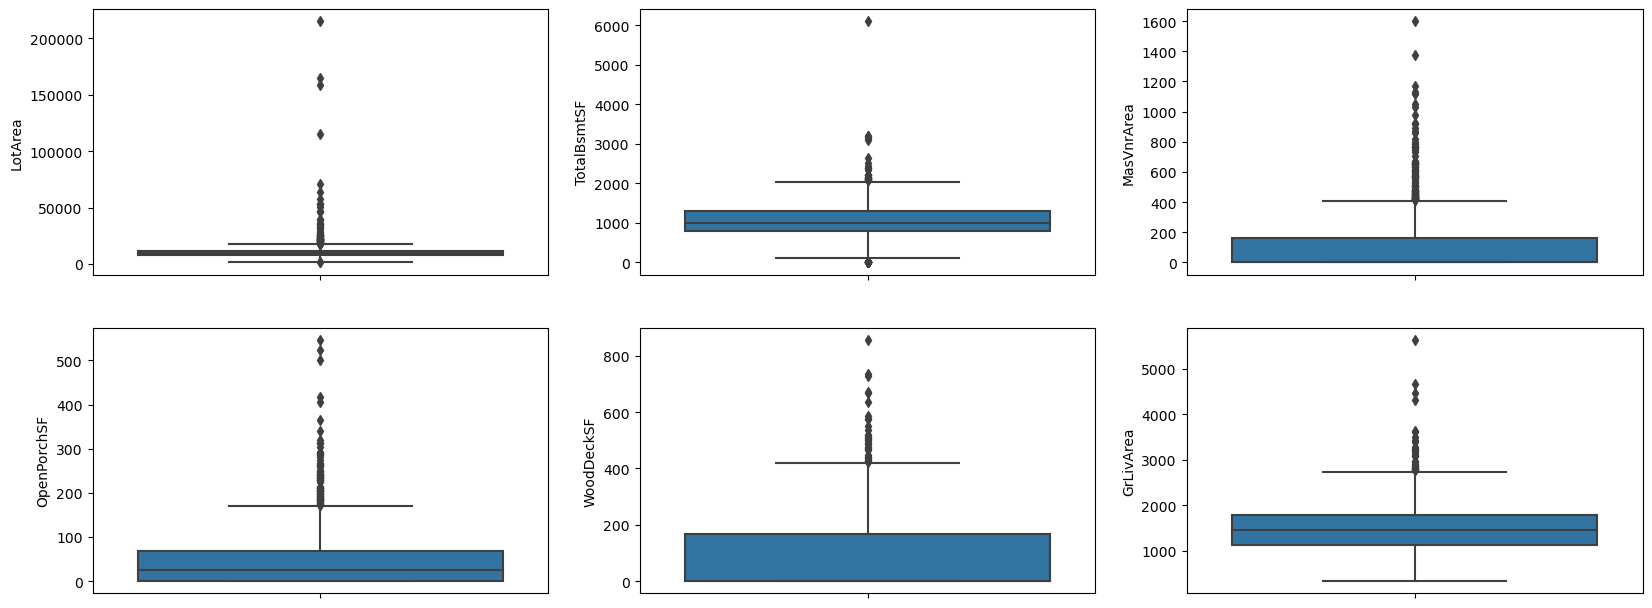

In [24]:
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea',  data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea',  data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF',  data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF',   data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea',   data = df)


plt.show()

In [25]:
LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < LotArea]
TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < TotalBsmtSF]
WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < WoodDeckSF]
OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < OpenPorchSF]
MasVnrArea = df['MasVnrArea'].quantile(0.99)
df = df[df["MasVnrArea"] < MasVnrArea]

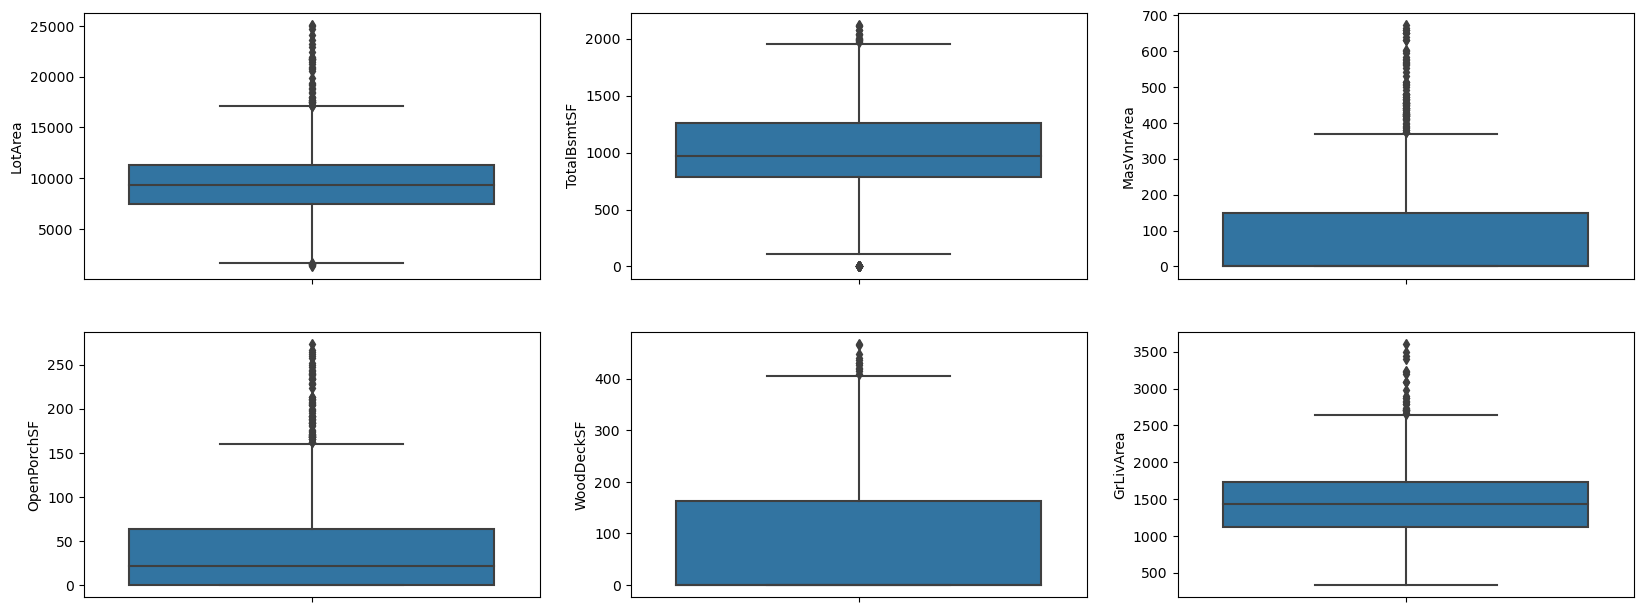

In [26]:
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea',  data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea',  data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF',  data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF',   data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea',   data = df)


plt.show()

We can see that outliers have been successfully removed. 

In [27]:
df.shape

(1372, 45)

In [28]:
1-(1460-1372)/1460 # we still have 94% percent data from our original dataset.

0.9397260273972603

In [29]:
categorical_var = df.select_dtypes(include='object').columns
df_dummy= pd.get_dummies(df[categorical_var],drop_first = True, dtype = int)   #generating dummy variables for categorical variables
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(categorical_var,axis=1)     #dropping original columns   

In [30]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,65.0,8450,7,5,196.0,706,150,856,856,854,...,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,284,1262,1262,0,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,162.0,486,434,920,920,866,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,540,756,961,756,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,490,1145,1145,1053,...,0,1,0,0,0,0,0,0,0,0


In [31]:
df.info()# contains only int, float, bool data types now

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1458
Columns: 171 entries, LotFrontage to MoSold_9
dtypes: float64(2), int32(147), int64(22)
memory usage: 1.0 MB


In [32]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [33]:
 X.corr()#Correlation matrix

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
LotFrontage,1.000000,0.566731,0.202744,-0.054958,0.176913,0.110780,0.148145,0.296573,0.349947,0.059579,...,0.045291,0.000655,0.004229,0.008533,-0.065715,-0.006886,0.020101,0.015610,-0.026743,0.058647
LotArea,0.566731,1.000000,0.183532,-0.010187,0.103550,0.149115,0.099481,0.298692,0.399986,0.116591,...,0.070915,0.000494,0.008557,0.002210,-0.048357,-0.043798,-0.012264,0.026506,0.021529,0.041298
OverallQual,0.202744,0.183532,1.000000,-0.093742,0.372725,0.200197,0.292143,0.518766,0.443210,0.272612,...,0.042976,0.053794,0.028909,-0.004421,-0.014209,-0.047424,-0.020157,-0.024379,0.019885,0.069586
OverallCond,-0.054958,-0.010187,-0.093742,1.000000,-0.124934,-0.019347,-0.145742,-0.166424,-0.140074,0.029104,...,-0.048828,-0.021079,-0.022073,0.006841,-0.023582,0.046634,0.039187,0.040314,-0.004836,-0.029468
MasVnrArea,0.176913,0.103550,0.372725,-0.124934,1.000000,0.220822,0.091371,0.317153,0.308364,0.123487,...,0.053985,0.013650,0.014872,0.023744,-0.040398,-0.035559,-0.004098,-0.027734,0.043286,0.023532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold_5,-0.006886,-0.043798,-0.047424,0.046634,-0.035559,-0.012242,-0.032152,-0.032081,-0.020106,-0.033558,...,-0.098171,-0.084996,-0.079395,-0.111979,-0.135421,1.000000,-0.183691,-0.179371,-0.124068,-0.088815
MoSold_6,0.020101,-0.012264,-0.020157,0.039187,-0.004098,-0.029573,-0.016587,-0.053917,-0.024121,0.004330,...,-0.108199,-0.093678,-0.087505,-0.123417,-0.149253,-0.183691,1.000000,-0.197693,-0.136741,-0.097887
MoSold_7,0.015610,0.026506,-0.024379,0.040314,-0.027734,-0.038379,0.010010,-0.032869,-0.050031,0.047734,...,-0.105655,-0.091475,-0.085447,-0.120514,-0.145743,-0.179371,-0.197693,1.000000,-0.133525,-0.095585
MoSold_8,-0.026743,0.021529,0.019885,-0.004836,0.043286,0.008874,0.017690,0.031151,0.029711,0.026785,...,-0.073079,-0.063272,-0.059102,-0.083357,-0.100808,-0.124068,-0.136741,-0.133525,1.000000,-0.066114


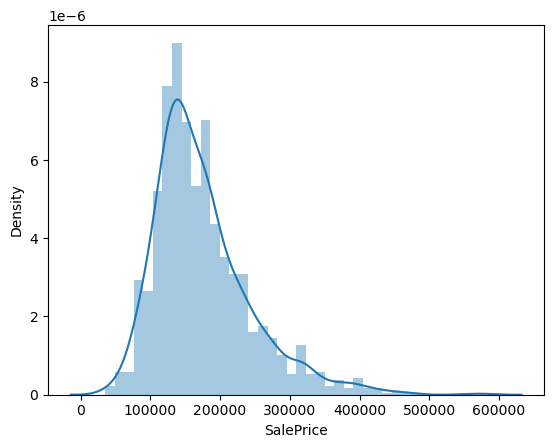

In [34]:
sns.distplot(y)
plt.show()

As we can see there is some right skewedness in the target variable and to handle that we are going to use log transform

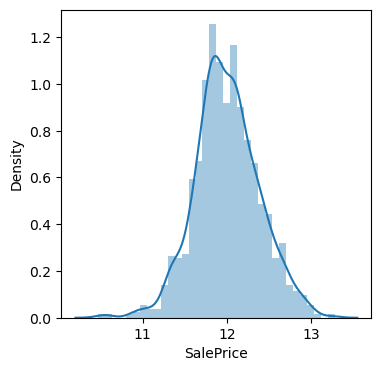

In [35]:
log_y = np.log(y)
plt.figure(figsize=(4,4))
sns.distplot(log_y)
plt.show()

Now the distribution looks almost normal. The target variable is now transformed.

There are 170 features in total. Lets check for multicollinearity using VIF (variance inflation factor) which gives how feature variables are correlated with each other.

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
155,GarageType_None,inf
156,GarageFinish_None,inf
101,Exterior2nd_CBlock,inf
135,BsmtFinType1_None,inf
126,BsmtQual_None,inf
...,...,...
41,LotShape_IR2,1.24
123,Foundation_Wood,1.23
140,HeatingQC_Po,1.19
42,LotShape_IR3,1.17


As we can see there are some columns with 'inf' as their vif. this shows that there exists mulitcollinearity among feature variables.

Since there are 170 variables, we can use RFE (recursive feature elimination) and get down to 50 features first, then continue further analysis.

 ## Train Test Split

In [37]:
df_train, df_test = train_test_split(df , train_size=0.7,test_size=0.3, random_state=100)

In [38]:
# Scaling the data using a Minmax Scaler
binary_cols = df_train.columns[(df_train.isin([0, 1])).all()]
non_binary_cols = df_train.columns[~df_train.columns.isin(binary_cols)]
scaler = MinMaxScaler()
df_train[non_binary_cols] = scaler.fit_transform(df_train[non_binary_cols])# fit transform on train data
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
1387,0.254902,0.297789,0.500,0.714286,0.0,0.097618,0.000000,0.336634,0.704087,0.535071,...,0,0,0,0,0,0,0,0,1,0
764,0.058824,0.341383,0.750,0.428571,0.0,0.253922,0.000000,0.704385,0.611444,0.000000,...,0,0,0,0,1,0,0,0,0,0
658,0.372549,0.678360,0.500,0.428571,0.0,0.000000,0.429986,0.429986,0.294278,0.338920,...,0,0,0,0,0,0,0,0,0,0
1294,0.254902,0.283045,0.375,0.714286,0.0,0.097037,0.328619,0.407355,0.268120,0.000000,...,0,0,0,0,1,0,0,0,0,0
28,0.169935,0.628283,0.375,0.571429,0.0,0.742010,0.097595,0.699670,0.669210,0.000000,...,0,1,0,0,0,0,0,0,0,0


In [39]:
df_test[non_binary_cols] = scaler.transform(df_test[non_binary_cols])#only transform on test data

In [40]:
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [41]:
X_train_copy = df_train.drop('SalePrice',axis=1)
X_test_copy = df_test.drop('SalePrice',axis=1)

### Recursive Feature Elimination

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 88),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 8),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 99),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 49),
 ('2ndFlrSF', False, 107),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('FullBath', False, 30),
 ('HalfBath', False, 33),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 109),
 ('Fireplaces', False, 92),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 53),
 ('OpenPorchSF', False, 67),
 ('age', True, 1),
 ('remodel_flag', False, 84),
 ('MSSubClass_160', False, 74),
 ('MSSubClass_180', False, 78),
 ('MSSubClass_190', False, 39),
 ('MSSubClass_20', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', False,

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'age',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_None', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA'],

In [45]:
X_train_rfe = X_train[col]

In [46]:
X_train = X_train_rfe
X_test  = X_test[X_train.columns]

In [47]:
print(X_test.shape)
print(X_train.shape)

(412, 50)
(960, 50)


## Model Building and Evaluation

### Ridge Regression

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
11,0.9,0.910997,0.891486,1
12,1.0,0.910741,0.891483,2
10,0.8,0.911251,0.891462,3
9,0.7,0.911504,0.891409,4
8,0.6,0.911753,0.891317,5
7,0.5,0.911999,0.891177,6
6,0.4,0.912238,0.890973,7
5,0.3,0.912468,0.890681,8
13,2.0,0.908163,0.890658,9
4,0.2,0.912680,0.890257,10


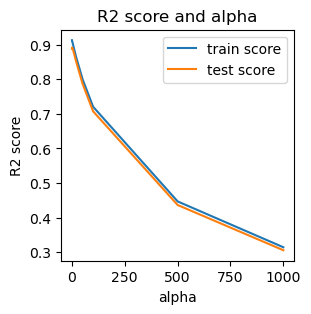

In [50]:
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(3, 3))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [51]:
##Finding the best estimator for alpha (lambda parameter)
print(ridge_model_cv.best_estimator_)

Ridge(alpha=0.9)


In [52]:
ridge = Ridge(alpha=0.9)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.01612814642953636
Coefficients:
 [ 0.04699035  0.14388281  0.073321    0.04464051  0.10752263  0.25160953
 -0.03774891  0.03357004  0.04414585 -0.08983394  0.02552429  0.03568685
  0.02132075  0.02948032  0.03313758  0.04666794  0.03901148  0.05572553
  0.02742974  0.01829692  0.01544982  0.02554717  0.02293112  0.01731155
  0.04091889  0.02095444  0.0548864   0.05728186  0.03567811  0.07318453
  0.02484756 -0.02340289  0.03067654  0.05229643  0.035932    0.0341005
  0.01867458  0.02104359 -0.00712346 -0.00176521  0.03007171  0.02372492
 -0.05508857 -0.04635879 -0.00964238 -0.05118652  0.03531936 -0.04810702
 -0.04268182 -0.05674364]


## Making predictions and evaluation

In [53]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
#R2 score
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_ridge)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_ridge)

## mean squared error (MSE) 
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_ridge)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_ridge)

##Root Mean Squared Error
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print('Evaluation metrics for Ridge model: ')
print('Train metrics: ')
print('r2_score_ridge_train: ',r2_score_ridge_train)
print('MSE_ridge_train:   ',MSE_ridge_train)
print('RMSE_ridge_train:  ',RMSE_ridge_train)
print('Test metrics: ')
print('r2_score_ridge_test: ',r2_score_ridge_test)
print('MSE_ridge_test:   ',MSE_ridge_test)
print('RMSE_ridge_test:  ',RMSE_ridge_test)

Evaluation metrics for Ridge model: 
Train metrics: 
r2_score_ridge_train:  0.9096829910965403
MSE_ridge_train:    0.0015808608466625408
RMSE_ridge_train:   0.03976004082823031
Test metrics: 
r2_score_ridge_test:  0.8927760276654781
MSE_ridge_test:    0.001495988411028743
RMSE_ridge_test:   0.038678009398477875


What are the top 10 most important features?

In [54]:
betas = pd.DataFrame(index = X_train.columns, columns = ['Ridge','Abs Ridge', 'Lasso','Abs Lasso'])
betas['Ridge'] = ridge.coef_
betas['Abs Ridge'] = abs(ridge.coef_)
betas.sort_values(by = 'Abs Ridge', ascending=False).head(10)

,Ridge,Abs Ridge,Lasso,Abs Lasso
GrLivArea,0.251610,0.251610,NaN,NaN
OverallQual,0.143883,0.143883,NaN,NaN
TotalBsmtSF,0.107523,0.107523,NaN,NaN
age,-0.089834,0.089834,NaN,NaN
OverallCond,0.073321,0.073321,NaN,NaN
Neighborhood_StoneBr,0.073185,0.073185,NaN,NaN
Neighborhood_NridgHt,0.057282,0.057282,NaN,NaN
KitchenQual_TA,-0.056744,0.056744,NaN,NaN
MSSubClass_75,0.055726,0.055726,NaN,NaN
BsmtQual_Fa,-0.055089,0.055089,NaN,NaN


### Residual Analysis of Model

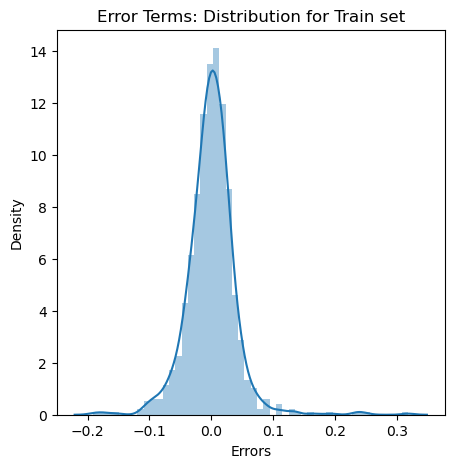

In [55]:
# Plot the histogram of the error terms
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_ridge)     
sns.distplot(res )
plt.title('Error Terms: Distribution for Train set')               
plt.xlabel('Errors') 
plt.show()

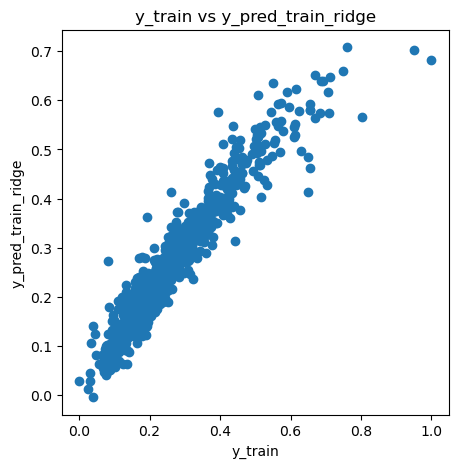

In [56]:
plt.figure(figsize = (5,5))
plt.scatter(y_train,y_pred_train_ridge)
plt.title('y_train vs y_pred_train_ridge')
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_ridge') 
plt.show()

Residual distribution seems to be normal with mean at 0. lets look for patterns in error terms

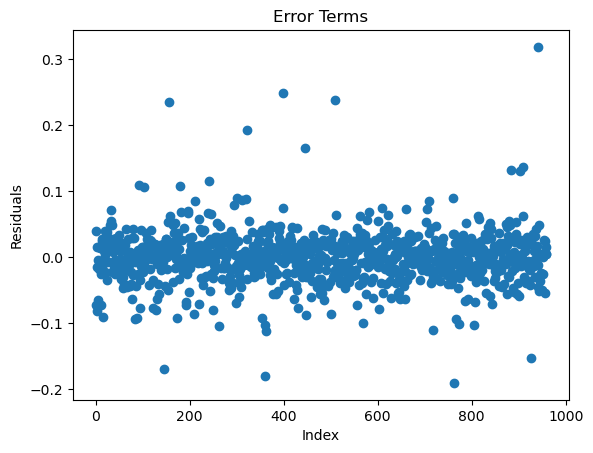

In [57]:
x = [i for i in range(0,len(y_train),1)]
plt.scatter(x, res)
plt.title('Error Terms')              
plt.xlabel('Index' )                      
plt.ylabel('Residuals' )   
plt.show()

There is no pattern found in error terms. they are scattered around 0 an are independent of each other.

### Residual analysis for test set

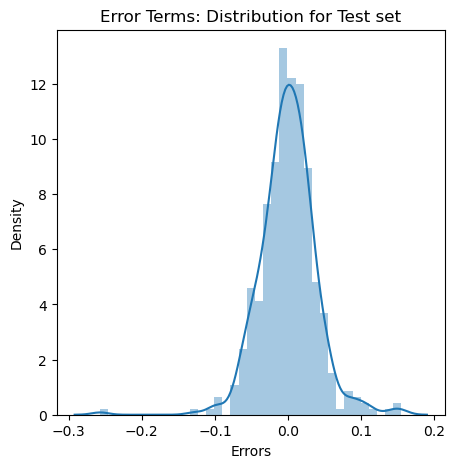

In [58]:
# Plot the histogram of the error terms
plt.figure(figsize=(5,5), dpi=100)
res_test = (y_test - y_pred_test_ridge)     
sns.distplot(res_test )
plt.title('Error Terms: Distribution for Test set')               
plt.xlabel('Errors') 
plt.show()

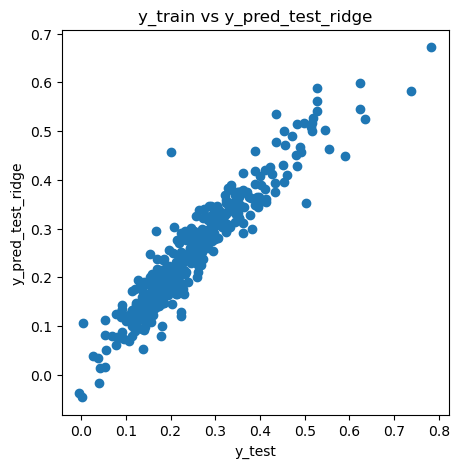

In [59]:
plt.figure(figsize = (5,5))
plt.scatter(y_test,y_pred_test_ridge)
plt.title('y_train vs y_pred_test_ridge')
plt.xlabel('y_test')              
plt.ylabel('y_pred_test_ridge') 
plt.show()

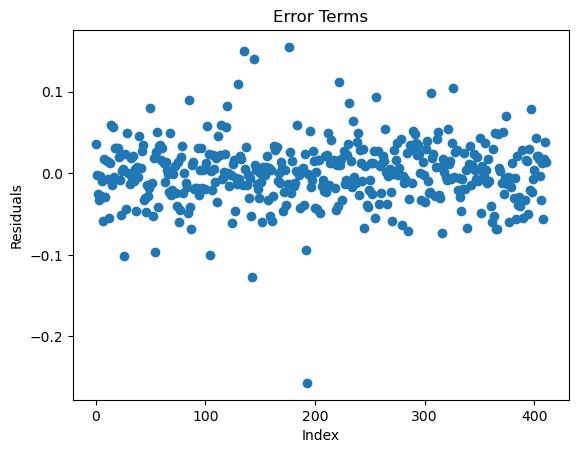

In [60]:
x = [i for i in range(0,len(y_test),1)]
plt.scatter(x, res_test)
plt.title('Error Terms')              
plt.xlabel('Index' )                      
plt.ylabel('Residuals' )   
plt.show()

The residuals are scattered along (y=0) and are independent of each other. the residual distribution is also normal.

## Lasso Regression

In [61]:
lasso = Lasso()

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9 ]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0001,0.909167,0.889358,1
0,0.00001,0.912841,0.889166,2
2,0.0002,0.905292,0.886762,3
3,0.0003,0.901670,0.883920,4
4,0.0005,0.894190,0.876883,5
5,0.0006,0.890482,0.873058,6
6,0.0007,0.886456,0.869131,7
7,0.0008,0.882050,0.864749,8
8,0.0009,0.877630,0.860481,9
9,0.001,0.873104,0.856139,10


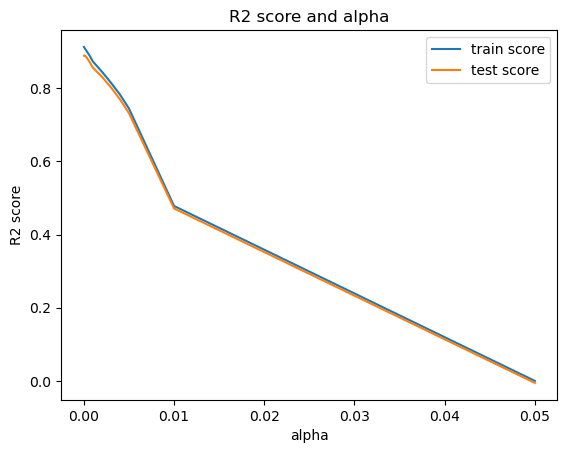

In [63]:
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')
lasso_results['param_alpha'] = lasso_results['param_alpha'][lasso_results['param_alpha']<0.1]
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')

plt.title("R2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [64]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [65]:
lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  0.01986837420577653
Coefficients:
  [ 0.04119975  0.15978304  0.07612515  0.04404279  0.10522777  0.27651002
 -0.03946537  0.03055913  0.03973306 -0.08790224  0.02289339  0.03177949
  0.          0.01856088  0.0248917   0.03935893  0.02989469  0.02963809
  0.02142771  0.         -0.          0.00732557  0.00364422  0.
  0.03734308  0.00479048  0.04871972  0.05503462  0.03211933  0.06655773
  0.01536209 -0.00700027 -0.          0.0145086   0.00365204  0.
  0.          0.01733698  0.         -0.          0.02172611  0.
 -0.04613659 -0.04308921 -0.00296625 -0.04621837  0.03376739 -0.04488071
 -0.03954525 -0.05296989]


In [66]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
#R2 score
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_lasso)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_lasso)

## mean squared error (MSE) 
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_lasso)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_lasso)

##Root Mean Squared Error
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print('Evaluation metrics for lasso model: ')
print('Train metrics: ')
print('r2_score_lasso_train: ',r2_score_lasso_train)
print('MSE_lasso_train:   ',MSE_lasso_train)
print('RMSE_lasso_train:  ',RMSE_lasso_train)
print('Test metrics: ')
print('r2_score_lasso_test: ',r2_score_lasso_test)
print('MSE_lasso_test:   ',MSE_lasso_test)
print('RMSE_lasso_test:  ',RMSE_lasso_test)

Evaluation metrics for lasso model: 
Train metrics: 
r2_score_lasso_train:  0.9074435186176321
MSE_lasso_train:    0.0016200593808264497
RMSE_lasso_train:   0.04024996125248383
Test metrics: 
r2_score_lasso_test:  0.8917518137820235
MSE_lasso_test:    0.0015102782388228741
RMSE_lasso_test:   0.03886229842434534


In [67]:
betas['Lasso'] = lasso.coef_
betas['Abs Lasso'] = abs(lasso.coef_)
betas.sort_values(by = 'Abs Lasso', ascending=False).head(10)

,Ridge,Abs Ridge,Lasso,Abs Lasso
GrLivArea,0.251610,0.251610,0.276510,0.276510
OverallQual,0.143883,0.143883,0.159783,0.159783
TotalBsmtSF,0.107523,0.107523,0.105228,0.105228
age,-0.089834,0.089834,-0.087902,0.087902
OverallCond,0.073321,0.073321,0.076125,0.076125
Neighborhood_StoneBr,0.073185,0.073185,0.066558,0.066558
Neighborhood_NridgHt,0.057282,0.057282,0.055035,0.055035
KitchenQual_TA,-0.056744,0.056744,-0.052970,0.052970
Neighborhood_NoRidge,0.054886,0.054886,0.048720,0.048720
BsmtQual_TA,-0.051187,0.051187,-0.046218,0.046218


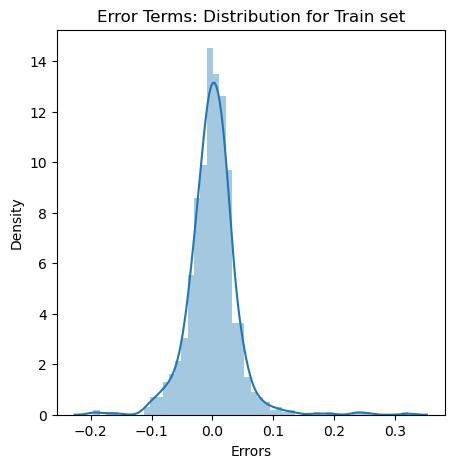

In [68]:
# Plot the histogram of the error terms
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_lasso)     
sns.distplot(res )
plt.title('Error Terms: Distribution for Train set')               
plt.xlabel('Errors') 
plt.show()

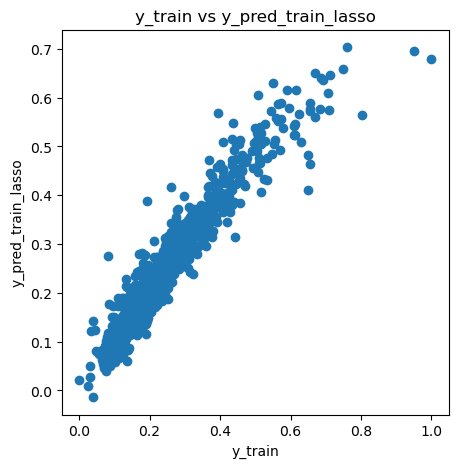

In [69]:
plt.figure(figsize = (5,5))
plt.scatter(y_train,y_pred_train_lasso)
plt.title('y_train vs y_pred_train_lasso')
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_lasso') 
plt.show()

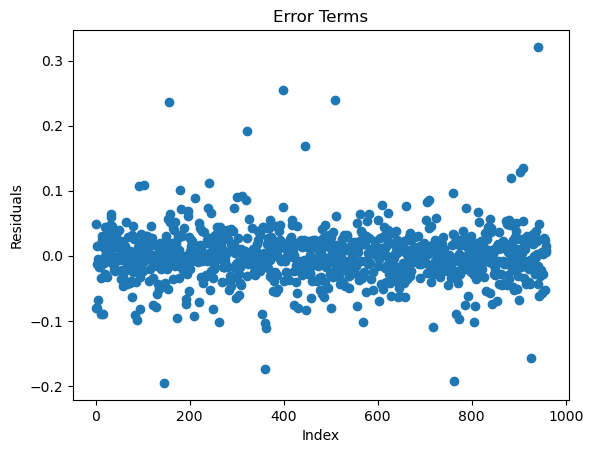

In [70]:
x = [i for i in range(0,len(y_train),1)]
plt.scatter(x, res)
plt.title('Error Terms')              
plt.xlabel('Index' )                      
plt.ylabel('Residuals' )   
plt.show()

There is no pattern found in error terms. they are sc
attered around 0 an are independent of each other.

### Residual analysis for test set

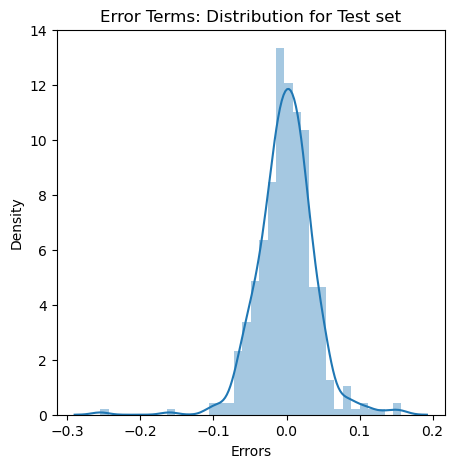

In [71]:
# Plot the histogram of the error terms
plt.figure(figsize=(5,5), dpi=100)
res_test = (y_test - y_pred_test_lasso)     
sns.distplot(res_test )
plt.title('Error Terms: Distribution for Test set')               
plt.xlabel('Errors') 
plt.show()

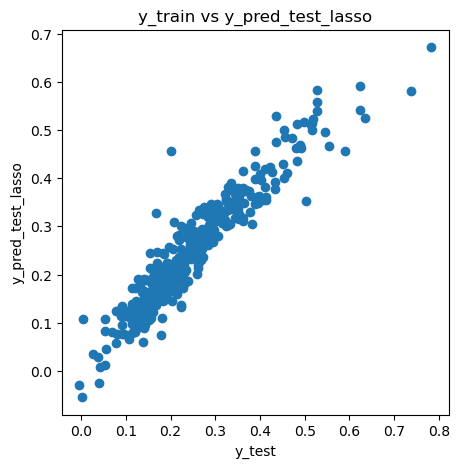

In [72]:
plt.figure(figsize = (5,5))
plt.scatter(y_test,y_pred_test_lasso)
plt.title('y_train vs y_pred_test_lasso')
plt.xlabel('y_test')              
plt.ylabel('y_pred_test_lasso') 
plt.show()

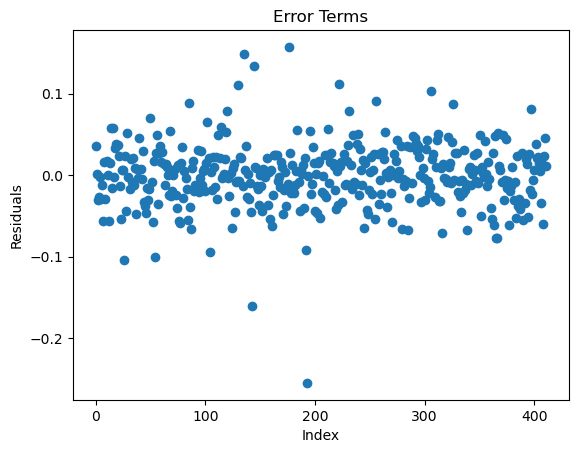

In [73]:
x = [i for i in range(0,len(y_test),1)]
plt.scatter(x, res_test)
plt.title('Error Terms')              
plt.xlabel('Index' )                      
plt.ylabel('Residuals' )   
plt.show()

The residuals are scattered along (y=0) and are independent of each other. the residual distribution is also normal.

# Subjective questions

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

optimal alpha for Ridge = 0.9


optimal alpha for Lasso = 0.0001


Lets check what happens if we double the alpha value

In [74]:
#Ridge Regression
ridge_2 = Ridge(alpha=1.8)

ridge_2.fit(X_train, y_train)
print("Intercept: ", ridge_2.intercept_)
print("Coefficients:\n",ridge_2.coef_)

Intercept:  0.0035057211203188277
Coefficients:
 [ 0.04828352  0.14421879  0.06860544  0.04494911  0.11070987  0.22538196
 -0.02220013  0.03819544  0.04459092 -0.07939649  0.02228224  0.02937992
  0.0151836   0.02203159  0.03085081  0.04724053  0.03634301  0.05011864
  0.02501569  0.01424055  0.00983611  0.0215658   0.01824483  0.01213338
  0.04110583  0.01684528  0.05485702  0.05707625  0.03489629  0.0698135
  0.02284806 -0.02012214  0.01685329  0.03536543  0.02286152  0.02038242
  0.01014893  0.02094731 -0.00090024 -0.00100963  0.02505148  0.01926246
 -0.0536954  -0.04644637 -0.01148485 -0.05255654  0.03476455 -0.04924309
 -0.04222268 -0.05865395]


In [75]:
y_pred_train_ridge_2 = ridge_2.predict(X_train)
y_pred_test_ridge_2 = ridge_2.predict(X_test)

r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_ridge_2)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_ridge_2)

## mean squared error (MSE) 
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_ridge_2)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_ridge_2)

##Root Mean Squared Error
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print('Evaluation metrics for Ridge model: ')
print('Train metrics: ')
print('r2_score_ridge_train: ',r2_score_ridge_train)
print('MSE_ridge_train:   ',MSE_ridge_train)
print('RMSE_ridge_train:  ',RMSE_ridge_train)
print('Test metrics: ')
print('r2_score_ridge_test: ',r2_score_ridge_test)
print('MSE_ridge_test:   ',MSE_ridge_test)
print('RMSE_ridge_test:  ',RMSE_ridge_test)

betas = pd.DataFrame(index = X_train.columns, columns = ['Ridge','Abs Ridge'])
betas['Ridge'] = ridge_2.coef_
betas['Abs Ridge'] = abs(ridge_2.coef_)
betas.sort_values(by = 'Abs Ridge', ascending=False).head(10)

Evaluation metrics for Ridge model: 
Train metrics: 
r2_score_ridge_train:  0.9079300249534199
MSE_ridge_train:    0.0016115438328998973
RMSE_ridge_train:   0.04014403857236959
Test metrics: 
r2_score_ridge_test:  0.8916503575121124
MSE_ridge_test:    0.0015116937562739496
RMSE_ridge_test:   0.03888050612162797


,Ridge,Abs Ridge
GrLivArea,0.225382,0.225382
OverallQual,0.144219,0.144219
TotalBsmtSF,0.110710,0.110710
age,-0.079396,0.079396
Neighborhood_StoneBr,0.069814,0.069814
OverallCond,0.068605,0.068605
KitchenQual_TA,-0.058654,0.058654
Neighborhood_NridgHt,0.057076,0.057076
Neighborhood_NoRidge,0.054857,0.054857
BsmtQual_Fa,-0.053695,0.053695


In [76]:
r2_score(y_test, y_pred_test_ridge_2)

0.8916503575121124

In [77]:
# these are the most important features after doubling alpha
betas.sort_values(by = 'Abs Ridge', ascending=False).head(10).index

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'age',
       'Neighborhood_StoneBr', 'OverallCond', 'KitchenQual_TA',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'BsmtQual_Fa'],
      dtype='object')

In [78]:
#Lasso Regression
lasso_2 = Lasso(alpha=0.0002)
        
lasso_2.fit(X_train, y_train) 
print("Intercept: ", lasso_2.intercept_)
print("Coefficients:\n ", lasso_2.coef_)

Intercept:  0.014565540619820017
Coefficients:
  [ 4.16720844e-02  1.73728751e-01  6.95706914e-02  4.47816384e-02
  1.06970477e-01  2.61919878e-01 -1.89114792e-02  3.16305932e-02
  3.90920905e-02 -7.13091197e-02  1.73598019e-02  2.03429404e-02
  0.00000000e+00  0.00000000e+00  1.58928632e-02  3.44989851e-02
  1.76567640e-02  4.86310925e-03  1.34861779e-02  0.00000000e+00
 -0.00000000e+00  4.35076761e-03  0.00000000e+00  0.00000000e+00
  3.48913008e-02  0.00000000e+00  4.38113423e-02  5.29047384e-02
  2.67173637e-02  5.81204357e-02  3.20310491e-03 -0.00000000e+00
 -0.00000000e+00  6.71591605e-05  3.23333805e-03  0.00000000e+00
 -0.00000000e+00  1.38856069e-02  0.00000000e+00  0.00000000e+00
  2.04142011e-02  0.00000000e+00 -3.79208715e-02 -4.04259978e-02
 -0.00000000e+00 -4.38398773e-02  3.27738700e-02 -4.28440913e-02
 -3.74867930e-02 -5.35079653e-02]


In [79]:
y_pred_train_lasso_2 = lasso_2.predict(X_train)
y_pred_test_lasso_2 = lasso_2.predict(X_test)

r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_lasso_2)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_lasso_2)

## mean squared error (MSE) 
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_lasso_2)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_lasso_2)

##Root Mean Squared Error
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print('Evaluation metrics for lasso model: ')
print('Train metrics: ')
print('r2_score_lasso_train: ',r2_score_lasso_train)
print('MSE_lasso_train:   ',MSE_lasso_train)
print('RMSE_lasso_train:  ',RMSE_lasso_train)
print('Test metrics: ')
print('r2_score_lasso_test: ',r2_score_lasso_test)
print('MSE_lasso_test:   ',MSE_lasso_test)
print('RMSE_lasso_test:  ',RMSE_lasso_test)

betas = pd.DataFrame(index = X_train.columns, columns = ['lasso','Abs lasso'])
betas['lasso'] = lasso_2.coef_
betas['Abs lasso'] = abs(lasso_2.coef_)
betas.sort_values(by = 'Abs lasso', ascending=False).head(10)

Evaluation metrics for lasso model: 
Train metrics: 
r2_score_lasso_train:  0.9036257535712544
MSE_lasso_train:    0.0016868835079410502
RMSE_lasso_train:   0.041071687425050483
Test metrics: 
r2_score_lasso_test:  0.8900877196587692
MSE_lasso_test:    0.001533495673031361
RMSE_lasso_test:   0.03915987325096139


,lasso,Abs lasso
GrLivArea,0.261920,0.261920
OverallQual,0.173729,0.173729
TotalBsmtSF,0.106970,0.106970
age,-0.071309,0.071309
OverallCond,0.069571,0.069571
Neighborhood_StoneBr,0.058120,0.058120
KitchenQual_TA,-0.053508,0.053508
Neighborhood_NridgHt,0.052905,0.052905
BsmtFinSF1,0.044782,0.044782
BsmtQual_TA,-0.043840,0.043840


In [80]:
r2_score(y_test, y_pred_test_lasso_2)

0.8900877196587692

In [81]:
# these are the most important features after doubling alpha
betas.sort_values(by = 'Abs lasso', ascending=False).head(10).index

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'age', 'OverallCond',
       'Neighborhood_StoneBr', 'KitchenQual_TA', 'Neighborhood_NridgHt',
       'BsmtFinSF1', 'BsmtQual_TA'],
      dtype='object')

2. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [82]:
# the top 5 important features from lass model are
top_5 = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'age', 'OverallCond']
X_train = X_train_copy.drop(top_5, axis=1)
X_test = X_test_copy.drop(top_5, axis=1)
X_train.shape

(960, 165)

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 103),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 22),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 28),
 ('FullBath', False, 9),
 ('HalfBath', False, 10),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 96),
 ('Fireplaces', False, 67),
 ('GarageCars', False, 31),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 39),
 ('OpenPorchSF', False, 41),
 ('remodel_flag', False, 79),
 ('MSSubClass_160', False, 113),
 ('MSSubClass_180', False, 53),
 ('MSSubClass_190', False, 116),
 ('MSSubClass_20', False, 19),
 ('MSSubClass_30', False, 40),
 ('MSSubClass_40', False, 37),
 ('MSSubClass_45', False, 24),
 ('MSSubClass_50', False, 38),
 ('MSSubClass_60', False, 8),
 ('MSSubClass_70', False, 12),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 30),
 ('MSSubClass_85', False, 60),
 ('MSSubClass_90', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1

In [85]:
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'GarageArea', 'MSSubClass_75', 'MSSubClass_90',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_CemntBd',
       'Exterior1st_VinylSd', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_None', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'Ga

In [86]:
lasso = Lasso()

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05]}


folds = 5
lasso_model_cv_2 = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_2.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
lasso_cv_results_2 = pd.DataFrame(lasso_model_cv_2.cv_results_)
lasso_cv_results_2[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0001,0.913311,0.861844,1
2,0.0002,0.906000,0.861800,2
3,0.0003,0.899698,0.860802,3
4,0.0004,0.893884,0.858019,4
5,0.0005,0.888504,0.853663,5
6,0.0006,0.882992,0.848972,6
7,0.0007,0.877749,0.844738,7
0,0.00001,0.920972,0.844120,8
8,0.0008,0.872436,0.840766,9
9,0.0009,0.867056,0.836554,10


In [88]:
lasso_model_cv_2.best_estimator_

Lasso(alpha=0.0001)

In [89]:
lasso_3 = Lasso(alpha=0.0001)
        
lasso_3.fit(X_train, y_train) 
print("Intercepts: ",lasso_3.intercept_)
print("Coefficients:\n",lasso_3.coef_)

Intercepts:  0.1325554719468828
Coefficients:
 [ 0.          0.03554495  0.02473197  0.07204258  0.05714572  0.18315327
  0.12788458  0.01064396  0.02769102  0.027181   -0.01370676  0.
  0.00810019  0.01834538  0.06441636  0.01332824  0.02031594  0.00494954
 -0.00643112 -0.         -0.02359387  0.02358725 -0.          0.
  0.         -0.          0.03411908  0.0194934   0.01763636  0.00938791
 -0.         -0.0212764   0.01397092 -0.          0.01510745  0.01149142
  0.01174131 -0.00489925  0.00413931  0.01200137 -0.0097019  -0.00251552
  0.00462394  0.          0.          0.00757136 -0.02060659 -0.
  0.03964096 -0.01794561 -0.         -0.01097067 -0.02308951 -0.00821995
 -0.01421009  0.02636522 -0.00289679  0.04375652  0.04810645 -0.01222143
 -0.02128744 -0.00708936  0.00672899  0.02810649  0.07984732 -0.
  0.02632014  0.         -0.00576151  0.00256024 -0.01043512 -0.00945669
  0.          0.         -0.          0.01046027  0.00710919  0.
  0.          0.         -0.01190723  0.0178

In [90]:
y_pred_train_lasso_3 = lasso_3.predict(X_train)
y_pred_test_lasso_3 = lasso_3.predict(X_test)

betas = pd.DataFrame(index = X_train.columns, columns = ['lasso','Abs lasso'])
betas['lasso'] = lasso_3.coef_
betas['Abs lasso'] = abs(lasso_3.coef_)
betas.sort_values(by = 'Abs lasso', ascending=False).head(5)

,lasso,Abs lasso
1stFlrSF,0.183153,0.183153
2ndFlrSF,0.127885,0.127885
Neighborhood_StoneBr,0.079847,0.079847
BsmtFinSF1,0.072043,0.072043
GarageArea,0.064416,0.064416


These are the five most important features after  are **1stFlrSF, 2ndFlrSF, smtFinSF1, GarageArea, Neighborhood_StoneBr**.